###  The Business Problem
Our client is a credit card company. They have brought us a dataset that includes
some demographics and recent financial data, over the past 6 months, for a sample
of 30,000 of their account holders. This data is at the credit account level; in other
words, there is one row for each account (you should always clarify what the
definition of a row is, in a dataset). Rows are labeled by whether, in the next month
after the 6-month historical data period, an account owner has defaulted, or in other
words, failed to make the minimum payment.

### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable:

- This study reviewed the literature and used the  following 23 variables as explanatory variables:

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1=graduate school; 2=university; 3=high school; 4 = others).
- X4: Marital status (1=married; 2=single; 3=others).
- X5: Age (year).

- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
- X6 = the repayment status in September, 2005; 
- X7 = the repayment status in August, 2005;...
- X11 = the repayment status in   April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . - X23 = amount paid in April, 2005.

**Note X1- LIMIT_BAL(CREDIT LIMIT) X6-X11 are called PAY_1-PAY_6 in our data. X12-x17 are BILL_AMT1-BILL_AMT6, and X18-X23 are PAY_AMT1-PAY_AMT6** 

### Goal
Your goal is to develop a predictive model for whether an account will default next month, given demographics and historical data.

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('C:\\Users\\Olumide\\Desktop\\data\\credit_card_default.xlsx')

In [4]:
df.shape

#30000 rows and 25 columns

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


##### Verifying basic data integrity

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
#id columns seems like it contains unique identifiers
#to ascertain this, we use the nunique() mtd

df['ID'].nunique()

#notice the number of unique entries is 29687, this shows that the number...
#...of unique is less than the number of roles-30,000

29687

In [9]:
#the above means that ID isn't a unique identifier for the rows of the data
#that means there are possible duplication of IDs
#let's find the duplication using .value_counts() method


id_counts = df['ID'].value_counts()
id_counts.head()
#this is stored in id_counts
#displaying 5 rows

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: ID, dtype: int64

In [10]:
#display the number of duplicated entry

id_counts.value_counts()

#313 ids occurred twice.
#also with this info no ids occur more than twice

1    29374
2      313
Name: ID, dtype: int64

In [11]:
#let's fix this quality issue, we can use Boolean/Logical masks
#this helps to filter an array or series by some conditions

dupli_mask = id_counts == 2

dupli_mask[0:5]

#the below shows the ids that are duplicated

ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: ID, dtype: bool

In [12]:
#to show the full duplication

dupli_mask

#recall that duplication==313

ad23fe5c-7b09     True
1fb3e3e6-a68d     True
89f8f447-fca8     True
7c9b7473-cc2f     True
90330d02-82d9     True
                 ...  
2edeb3a6-d38d    False
27e11893-92e9    False
2b1c282b-441e    False
bd737997-0eb0    False
15d69f9f-5ad3    False
Name: ID, Length: 29687, dtype: bool

In [13]:
#now select the ids that are duplicated
#the ids are in the index of id_counts

id_counts.index

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789',
       ...
       'ed32d9fa-fc4d', '0d3c491a-f31a', '43b86f14-5293', '9aea1c3d-6a89',
       'eecd60d0-e496', '2edeb3a6-d38d', '27e11893-92e9', '2b1c282b-441e',
       'bd737997-0eb0', '15d69f9f-5ad3'],
      dtype='object', length=29687)

In [14]:
dupli_ids = id_counts.index[dupli_mask]

dupli_ids = list(dupli_ids)  #converting dupli_ids to a list

len(dupli_ids)

313

In [15]:
#let's examine the duplicate ids with the "original"

df.loc[df['ID'].isin(dupli_ids[0:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


observe from the above that from **ID** column the duplication, but more 
importantly that for each row of duplication one has a valid data and the seems to have a not-so valid data containing zero's.

To deal with this, all rows containing zero should be deleted as it is invalid data, e.g it makes no sense have a age of 0 or credit limit of 0

In [16]:
#firstly we find the entries in the entire df that are 0 by creating...
#by creating a boolean matrix thesame size with whole df

df_zero = df == 0
df_zero[0:6]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True


the boolean matrix was created to be able to easily identified quickly elements that matches 0 which will be "true" from there create a boolean series that would match 0(true) element from the boolean matrix in every other columns(features) apart from IDs. the goal is to get one series that is the same length as the ***df** telling us which rows have all 0's besides the ID **See code below** 

In [17]:
features_zero = df_zero.iloc[:,1:].all(axis=1)

In [18]:
features_zero

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [19]:
sum(features_zero) #calculating the sum of the boolean series
#315  have zero rows

315

So the above shows there are 315 rows are zero's apart form the first one. This is greater than the number of duplicate IDs(313). This means if we delete all the 0's rows, we probabl get rid of duplicate IDs.

To do this we clean the data by eliminating the zero

In [20]:
clean_df = df.loc[~features_zero,:].copy()

#.copy() method creates a copy of the output as oppose to the original frame
#the new dataframe is clean_df

In [21]:
clean_df.shape

(29685, 25)

In [22]:
clean_df['ID'].nunique()

#id is equal to the number of rows now, 
#and the duplicates have been eliminated

29685

In [23]:
#save the new dataframe(clean_df)

clean_df.to_csv('C:\\Users\\Olumide\\Desktop\\data\\clean_df.csv', index=False)

#we didn't include index of df when savings becaus it can create...
#extra columns when loaded later.

### Exploring and Cleaning the Data

Here, we examine the values of the features and response variable. This data would be use to develop our predictive model.

In [24]:
#load the data we saved

clean_df = pd.read_csv('C:\\Users\\Olumide\\Desktop\\data\\clean_df.csv')

In [25]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

From the info above we can see that most columns says int64 indicating that they are integers, the exceptions are ID(which we already know) and PAY_1, but PAY_1 is meant to be an integer because of what it indicates. **Let's examine PAY_1**

In [26]:
clean_df['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

the integers on the left are indexes of the df selected... PAY_1 column is shown on the left, PAY_1 refers to the payment status of month's bill referred in the Attribute Information.

Where -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months -2 = ccount started that month with a zero balance and never used any credit, -1 = the account had a balance that was paid in full; 0 = least the minimum payment was made, but the entire balance wasn't paid

In [27]:
#let's examine it more closely

clean_df['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [28]:
#notice there is 'Not available' string, this refers to missing data.
#let's remove the rows with this missing data

pay_1_valid = clean_df['PAY_1'] != 'Not available'

pay_1_valid[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [29]:
#check how many rows of missing values now
sum(pay_1_valid)

26664

no missing values anymore, remember we saw that from the value_counts of 'not available' there are 3021. Hence 29685 -3021 = 26,664

In [30]:
#clean the data by eliminating the rows with the missing values of PAY_1

clean_df2 = clean_df.loc[pay_1_valid,:].copy()

In [31]:
clean_df2.shape

(26664, 25)

In [32]:
clean_df2['PAY_1'].value_counts()

0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: PAY_1, dtype: int64

In [33]:
#now remember PAY_1 was refer to have an object data type...
#when it is ordinarily an integer, to change this we typecast

clean_df2['PAY_1']= clean_df2['PAY_1'].astype('int64')
clean_df2[['PAY_1', 'PAY_2']].info()#ensuring the pay_1 and pay_2 are thesame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29684
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [34]:
clean_df2.to_csv('C:\\Users\\Olumide\\Desktop\\data\\clean_df2.csv', index=False)

### DATA QUALITY ASSURANCE AND EXPLORATION

exploring the data through histograms
histograms are a good way to visualize data on a continuous scale..
e.g currency amounts and ages

let begin with credit limit(LIMIT_BAL) & age-numerical features measured on a continuous scale 
next; education, marriage-categorical feature




In [35]:
import matplotlib.pyplot as plt #import plotting package

#render plotting automatically
%matplotlib inline 

import matplotlib as mpl  #additional plotting functionality

mpl.rcParams['figure.dpi'] = 400 #high resolution figures



In [36]:
clean_df2 = pd.read_csv('C:\\Users\\Olumide\\Desktop\\data\\clean_df2.csv')

## Histogram

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

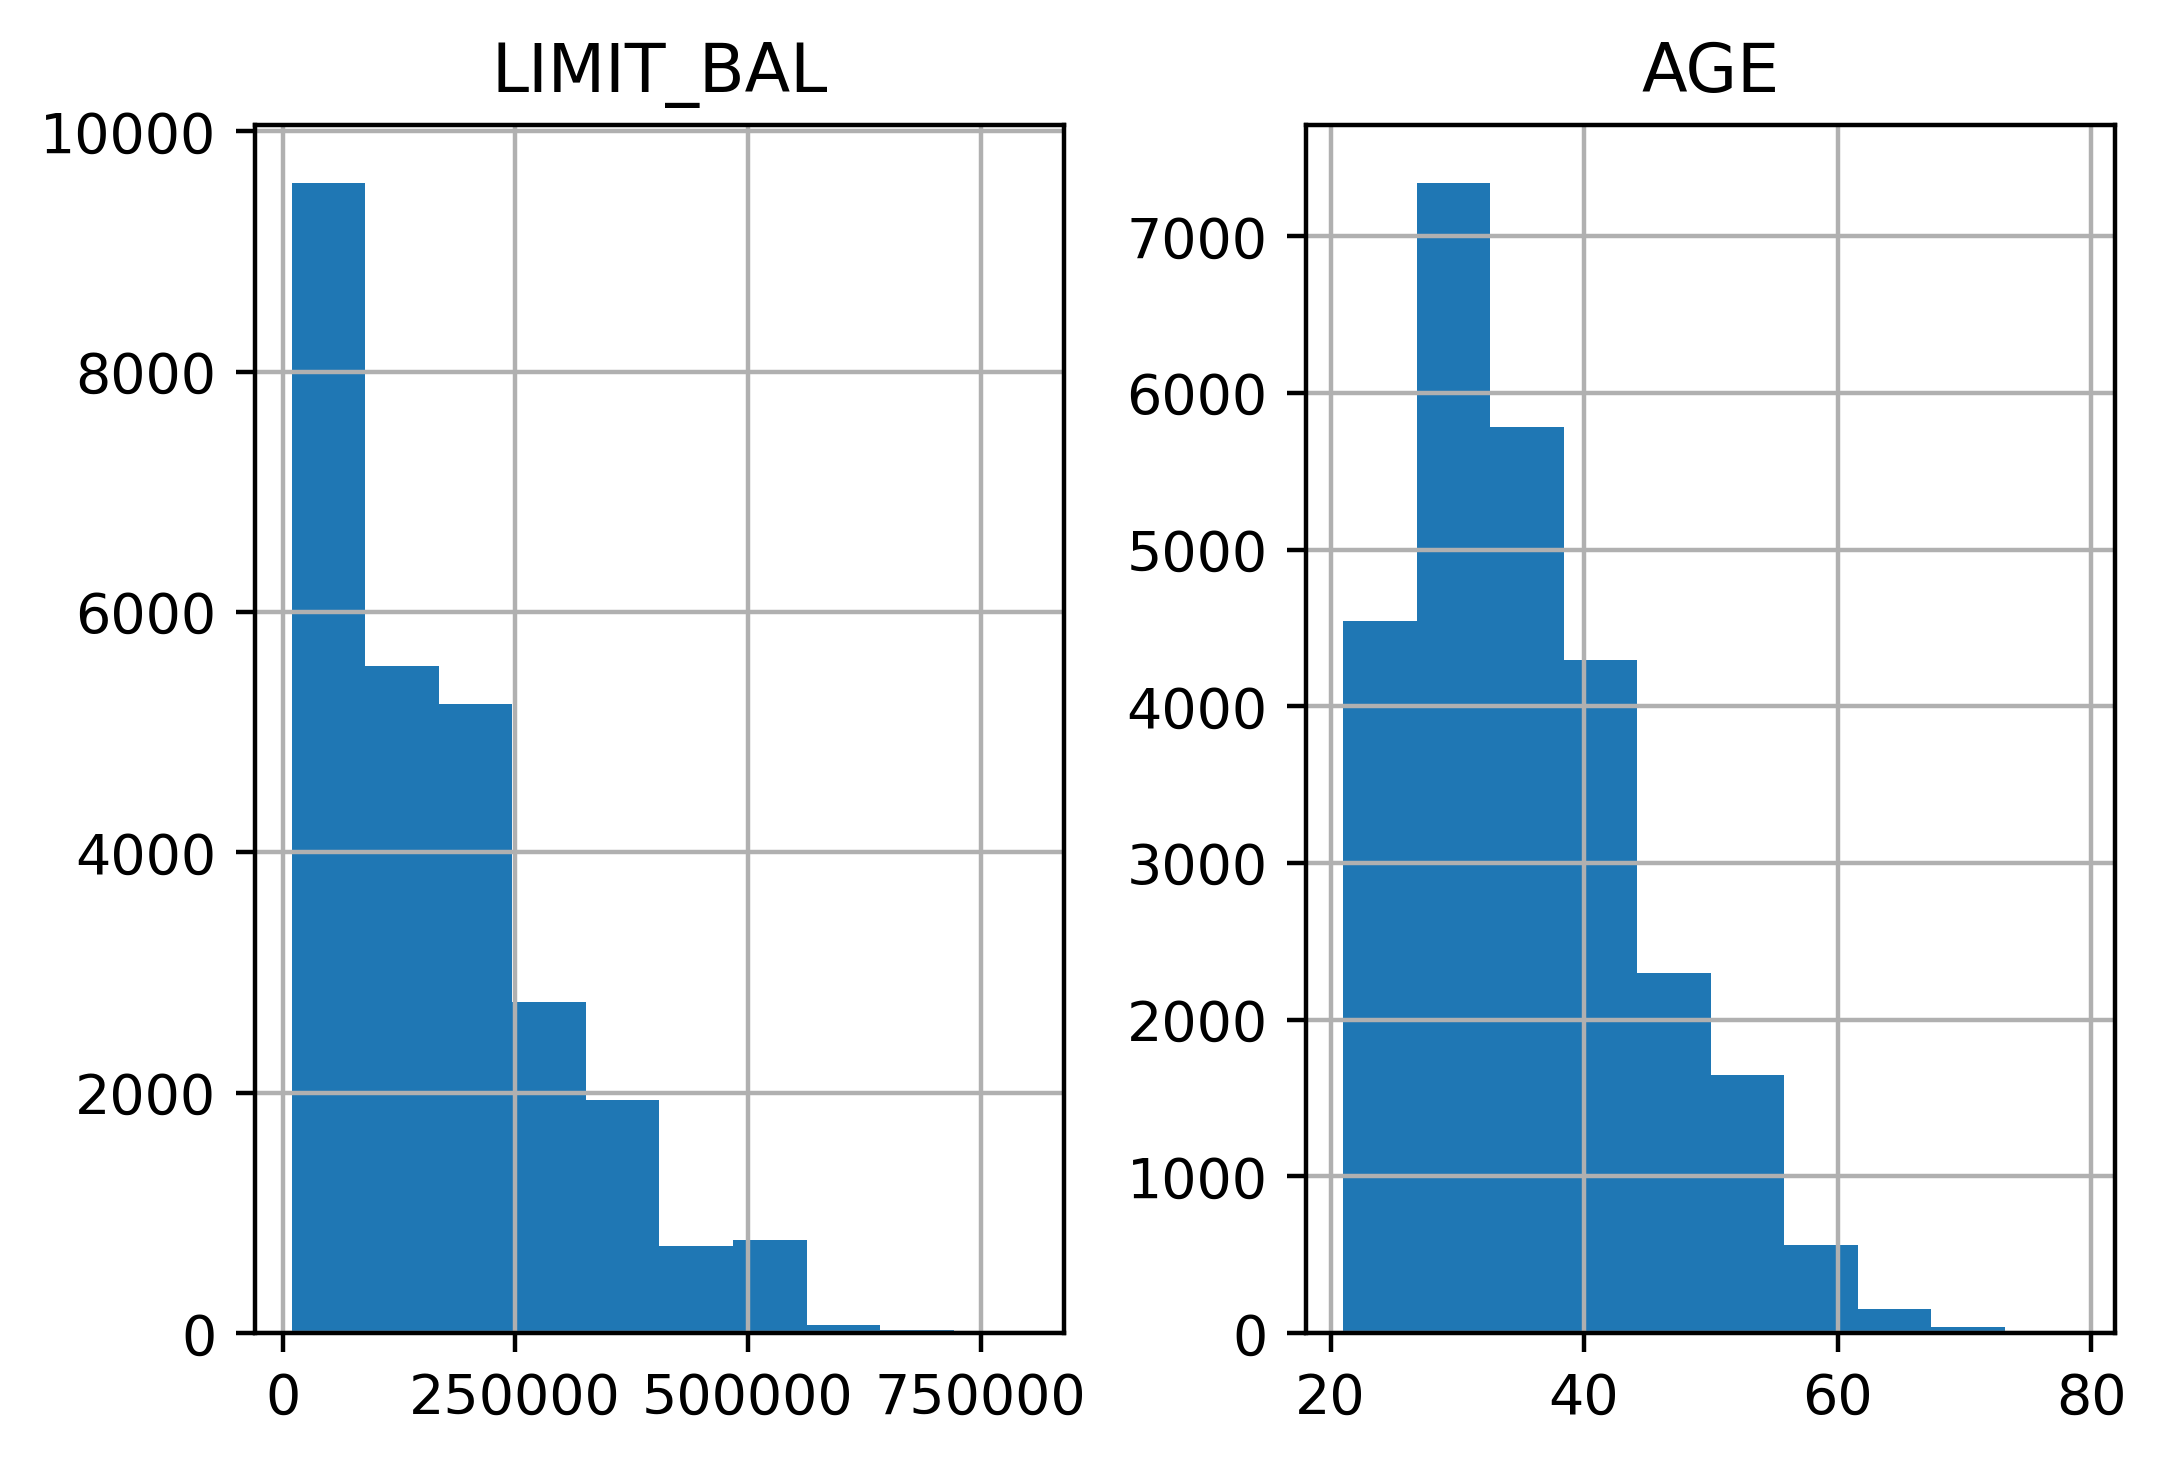

In [37]:
clean_df2[['LIMIT_BAL', 'AGE']].hist()

#### Statistical Summary

In [38]:
clean_df2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


Based on the histograms and the convenient statistics computed by
**.describe()**, which include a count of non-nulls, the mean and standard
deviation, minimum, maximum, and quartiles, we can make a few judgments:

**LIMIT_BAL**: the credit limit, seems to make sense. The credit limits have a minimum of 10,000. Has intuitively, a credit limit should be above
zero. For example, 1 US dollar is about 29 NT dollars

**AGE**: feature also looks reasonably distributed, with no one under the age of
21 having a credit account

#### Categorical features

In [39]:
clean_df2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

0,5,6 are not included in the dictionary of the datasets as regards to education, now since they are not so much, we can decide to include it in the ***others*** category which is 4. To do that we:


In [40]:
clean_df2['EDUCATION'].replace(to_replace=[0,5,6],\
                              value=4, inplace=True)

clean_df2['EDUCATION'].value_counts()

#the pandas .replace() makes doing the replacement pretty quick
#the inplace=True means that instead of returning a new Df..
#this operation will make the changes to existing df

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [41]:
clean_df2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

Just like the issue in "education" datasets. the value for 0, isn't included in "marriage", we have only; 1,2,3. Inthe same way did that of education we would add to the **others** category which is 3 here 

In [42]:
clean_df2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

clean_df2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [43]:
clean_df2.to_csv('C:\\Users\\Olumide\\Desktop\\data\\clean_df2a.csv', index=False)

### Analyzing categorical Variables

Now, since education and marriage df are categorical variables, it is often very diffcult to use in a machine learning model, as they are not neccessarily numerical in nature, there numerical values(ordinal encoding) are just representation of a category, such has in this case.

Hence they may not have a linear relationship with the outcome(response) we are trying to predict.

A linear relationship is usually represented by a straight line that bests fits btw the features and responses.

In the case of this problem, which is a classificaton problem, can also assume a linear effect of features-some classification algo e.g ***logistic regreession** which is like this case, they have two outcomes, YES OR NO(O, 1).

With that been the case, we can then closely examine whether our categorical variables can show us a  linear relationship with the outcome(response). This can be clearly seen using a ***groupby/aggregate procedure and a bar plt in pandas***:

In [44]:
clean_df2 = pd.read_csv('C:\\Users\\Olumide\\Desktop\\data\\clean_df2a.csv')

Text(0.5, 0, 'Education level: ordinal encoding')

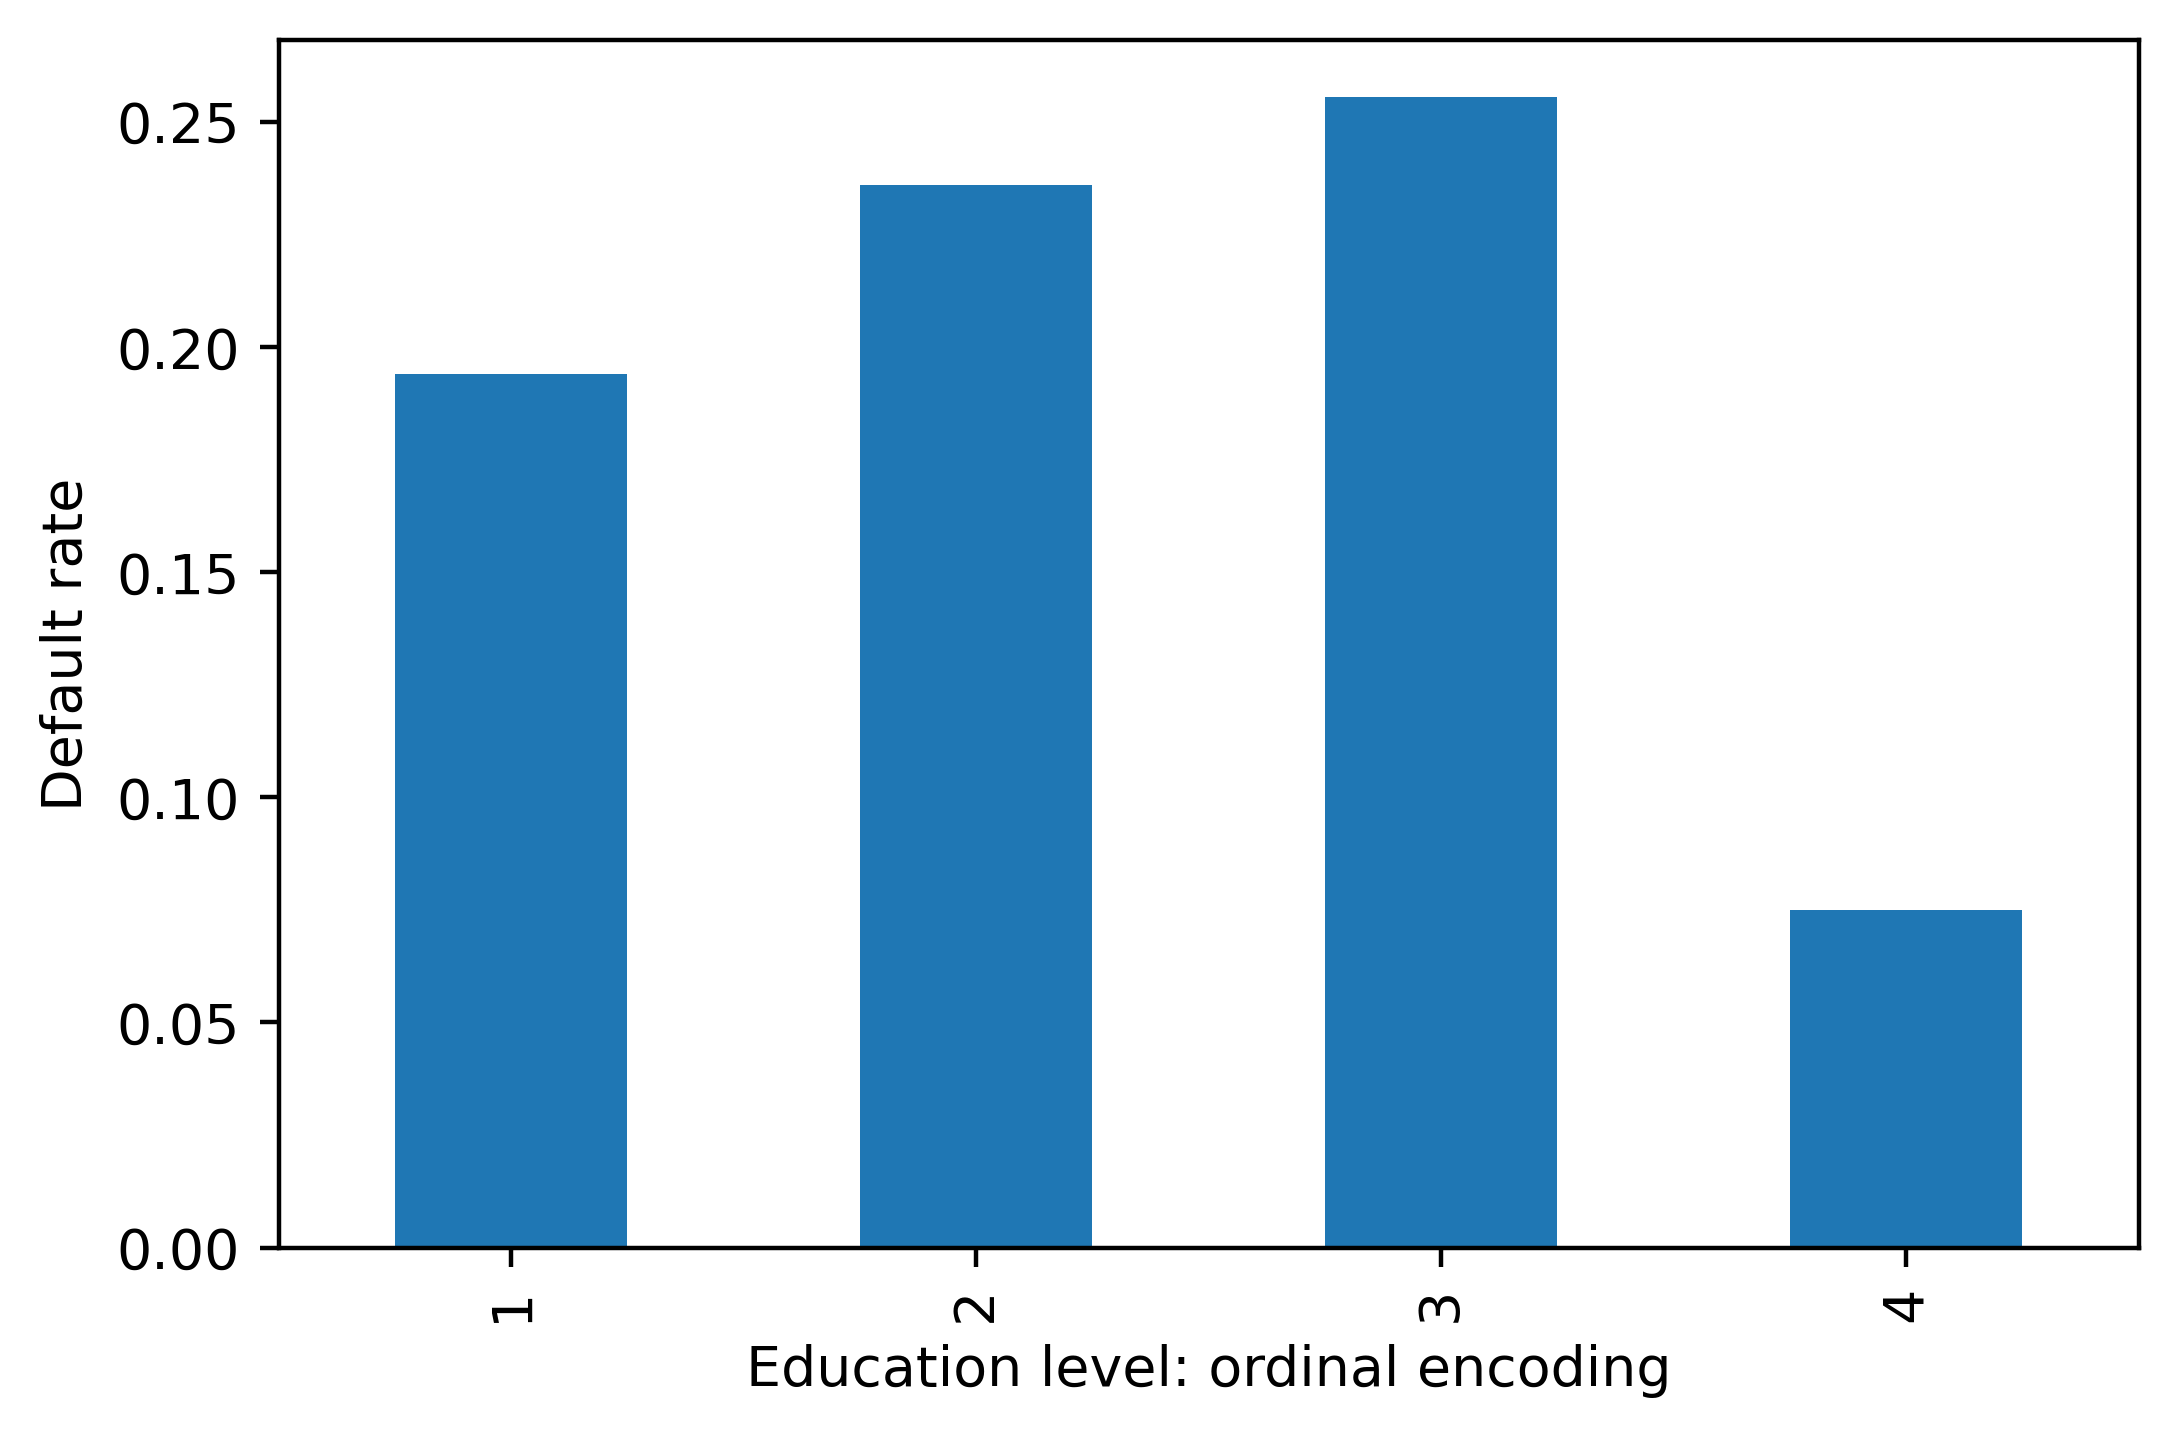

In [45]:
clean_df2.groupby('EDUCATION').agg({'default payment next '\
                                   'month': 'mean'}).plot.bar(legend=False)

plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

From the above, a straight-line fit would probably not
be the best description of the data here. i.e. there is a non-linear relationship, when this is case, we can often change the ordinal encoding of the categorical variables to one-hot encoding(OHE), since we desiring a logistic regression.

OHE transforms a categorical features into a numerical feature that can then be used in ML/mathmatical models

In [46]:
clean_df2['EDUCATION_CAT'] = 'none'

In [47]:
clean_df2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [48]:
#using map method to determine the right level for the education variable...
#and fill it in the new column

cat_map ={1: "graduate school",\
         2: "university", \
         3: "high school", \
         4: "others"}

In [49]:
clean_df2['EDUCATION_CAT'] = clean_df2['EDUCATION']\
                               .map(cat_map)

clean_df2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [50]:
#now to OHE, we would use pandas, get_dummies function

edu_ohe = pd.get_dummies(clean_df2['EDUCATION_CAT'])

edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [51]:
#let combine "edu_ohe" with the "edu_cat" column to see..
#how each row for a given level be 1 in relation to its column...
#while the rest is 0. to do this we concatenate

df_ohe = pd.concat([clean_df2, edu_ohe], axis=1)

df_ohe [['EDUCATION_CAT', 'graduate school', 'high school',\
          'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


so for the first row; university, it matches with is column head as university hence 1, the rest 0.. just like that for the rest


***note here; that the education column has now been expanded using OHE into many columns, this is not oftentimes esp if the cat features as many levels, e.g 10.we may want to consider another strategy such as "grouping some levels together into single categories". But here since its just 4. I think its not such a big deal.***

### Examining the numerical (financial in this case) features in the dataset

In [52]:
df_ohe.to_csv('C:\\Users\\Olumide\\Desktop\\data\\clean_data.csv', index=False)

In [53]:
import numpy as np
from scipy import stats

In [54]:
clean_df3 = pd.read_csv('C:\\Users\\Olumide\\Desktop\\data\\clean_data.csv')

In [55]:
pay_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [56]:
clean_df3[pay_fts].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [57]:
clean_df3[pay_fts[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [58]:
pay_1_bins = np.array(range(-2,10)) - 0.5

Text(0, 0.5, 'Number of accounts')

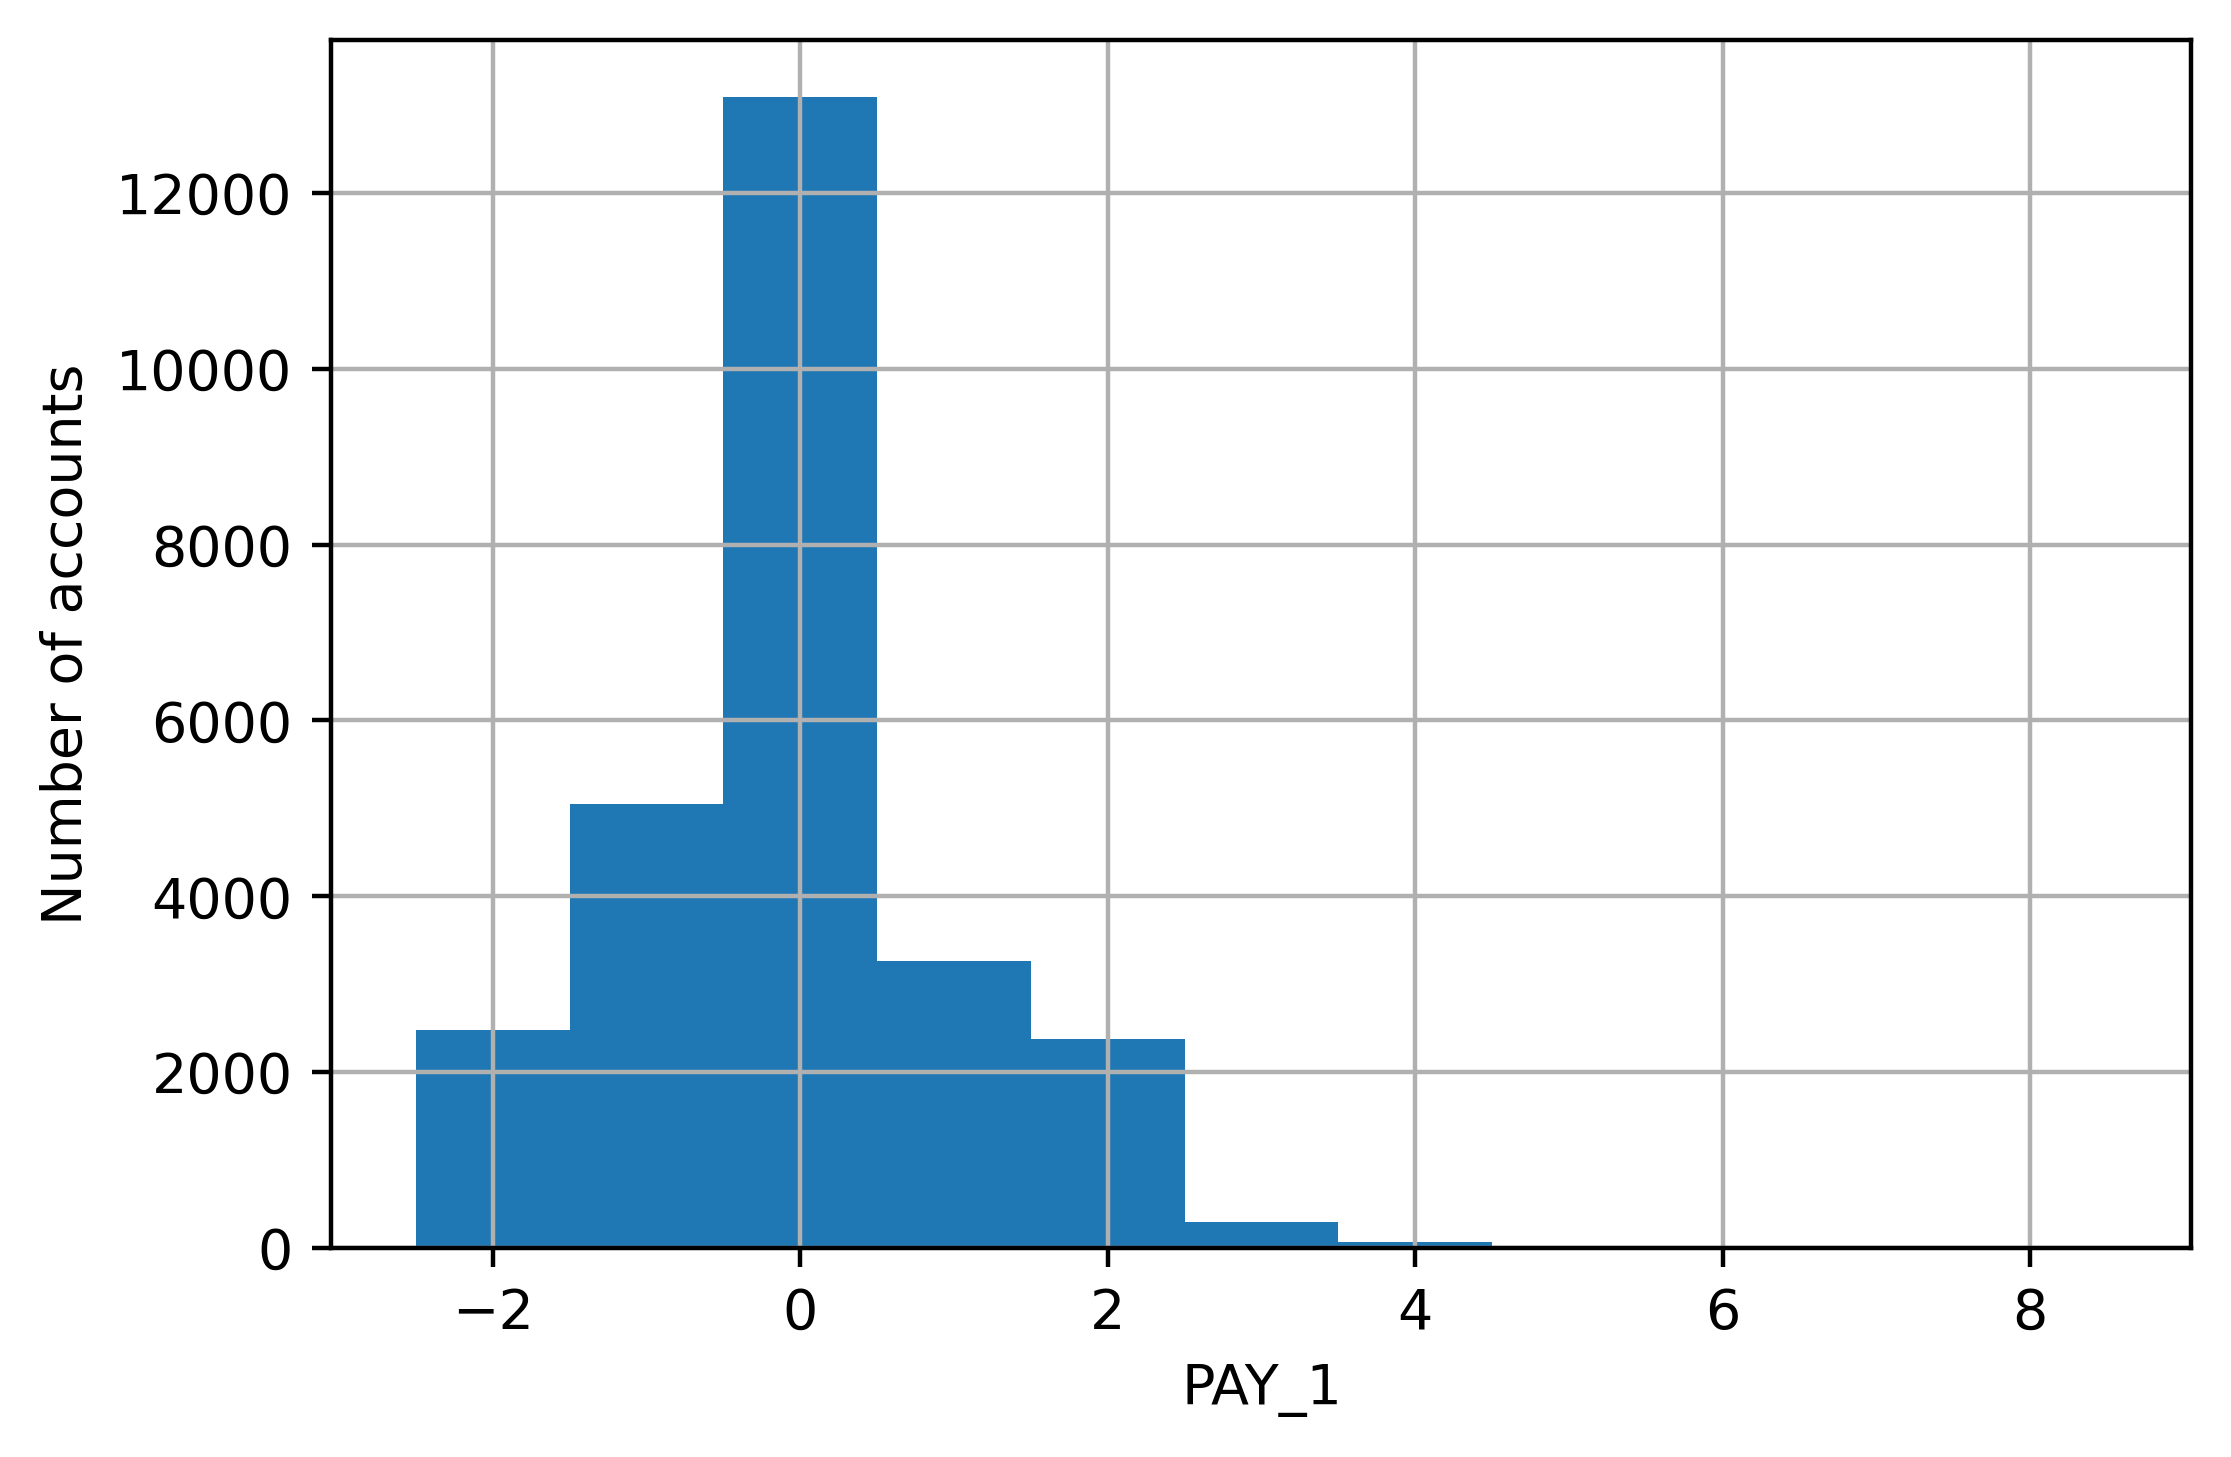

In [59]:
clean_df3[pay_fts[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

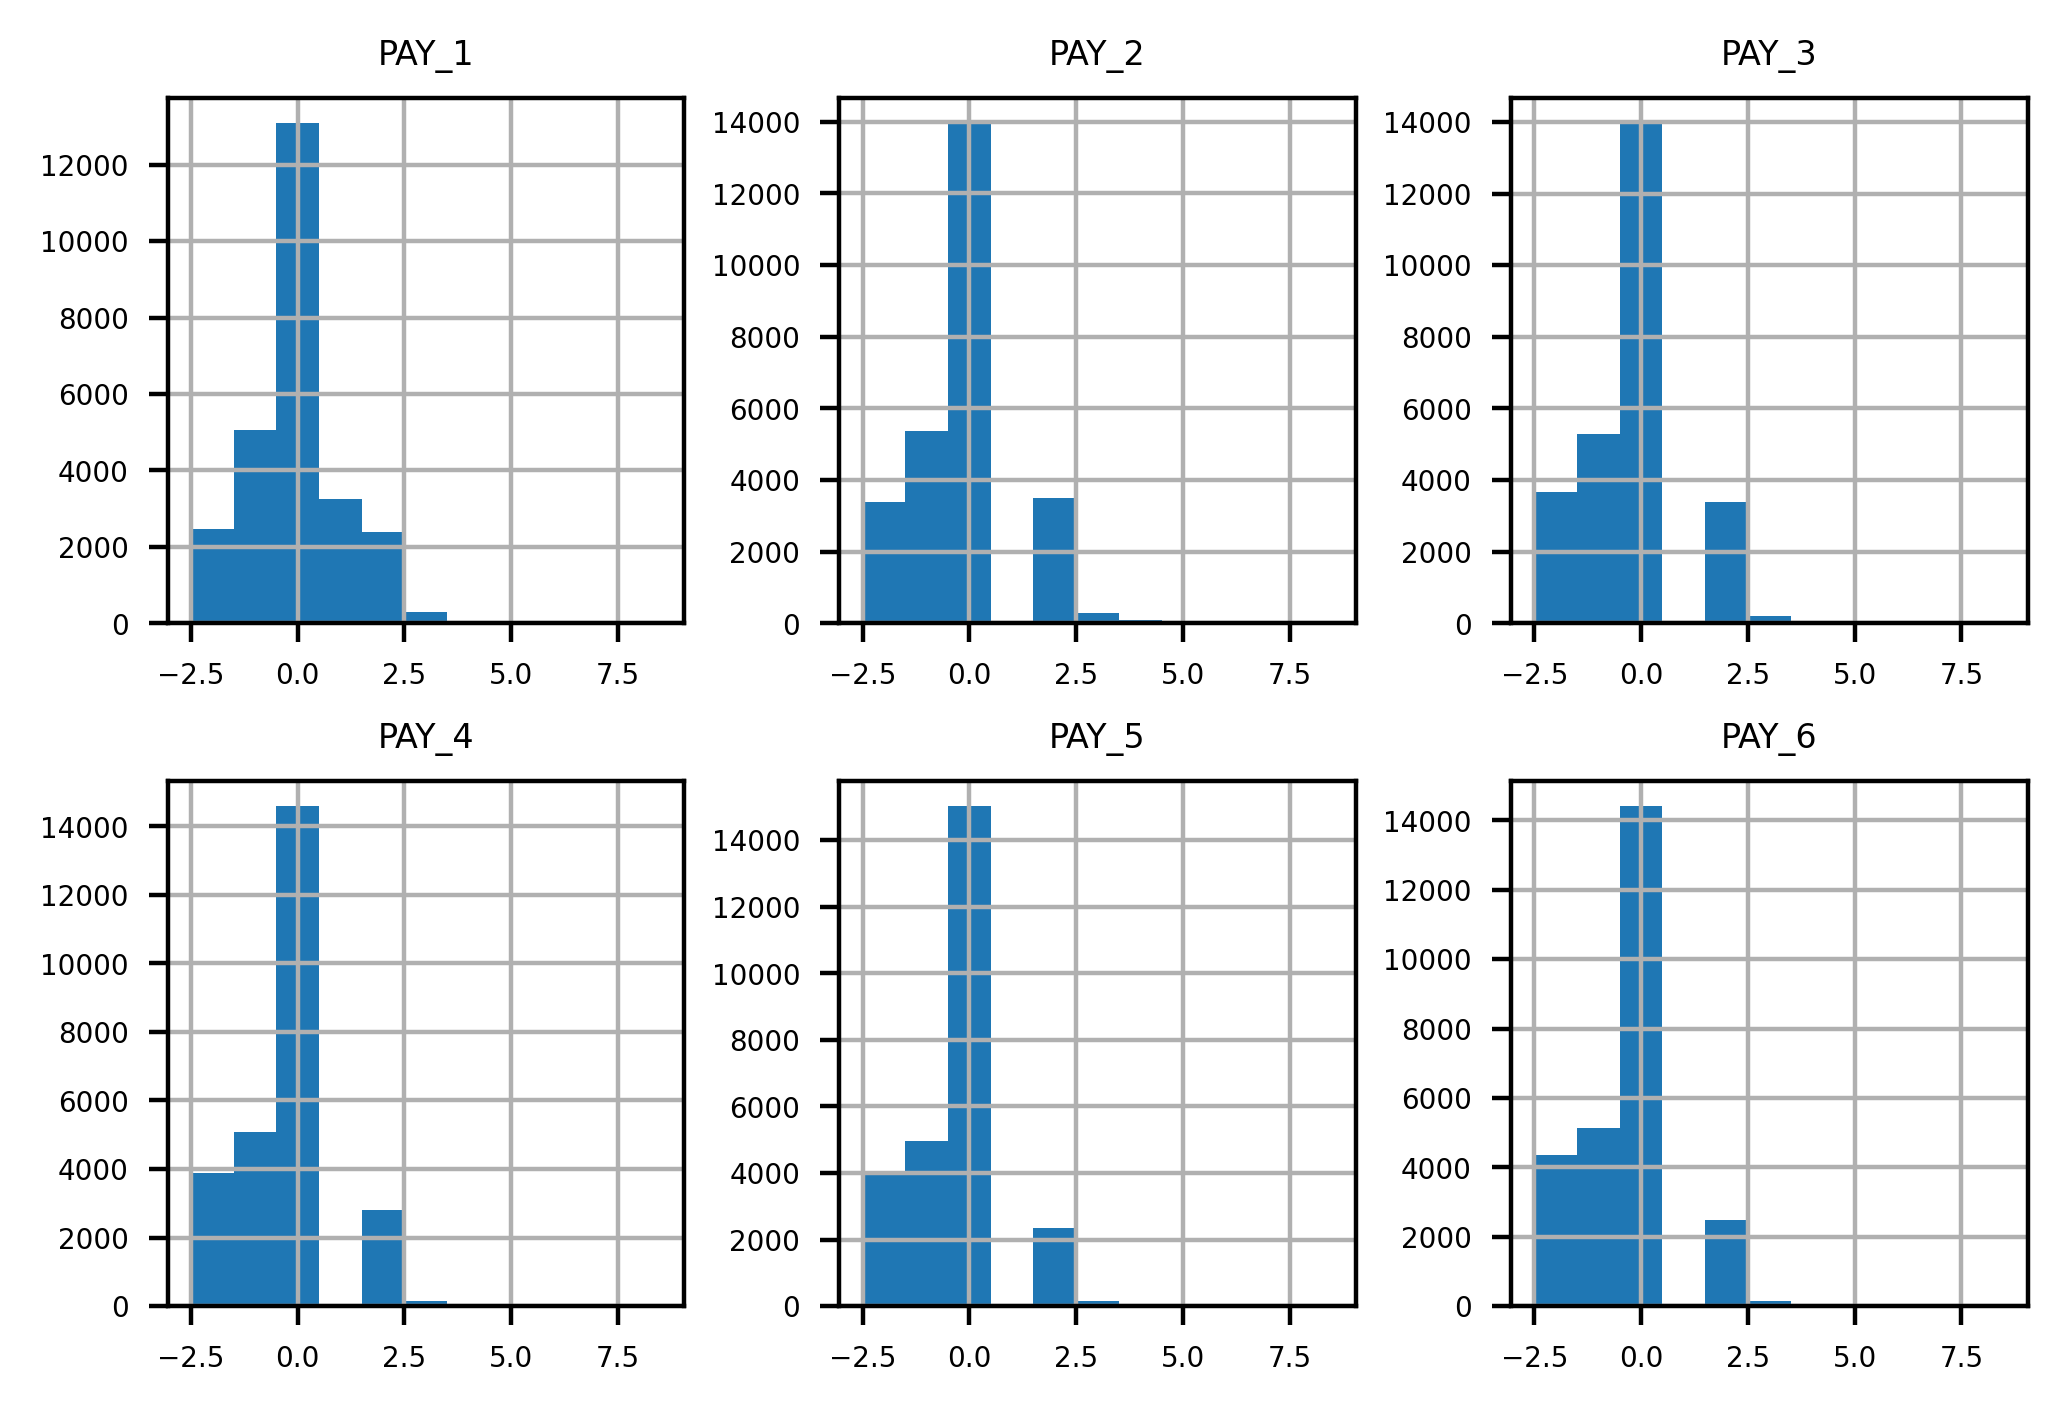

In [60]:
mpl.rcParams['font.size'] = 5

clean_df3[pay_fts].hist(bins=pay_1_bins, layout=(2,3))

from the above, consider the values btw July(PAY_3) and August(PAY_2). n July, there are very few accounts that had a 1-month payment delay; this bar is not really visible in the histogram. However, in August, there are suddenly thousands of accounts with a 2-month payment delay. This does not make sense: the number of accounts with a 2-month delay in a given month should be less than or equal to the number of accounts with a 1-month delay in the previous month.

***see it closely:***

In [61]:
clean_df3.loc[clean_df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,0


Hence, it's clear that accounts with a 2-month delay in August have
nonsensical values for the July payment status. The only way to progress to a 2-month delay should be from a 1-month delay the previous month, yet none of these accounts indicate that.

***So, it seem only the most recent month of our payment status data is correct.This means that, of all the payment status features, only PAY_1 is representative of future data, those that will be used to make predictions with the model we develop***

###### Examining the other financial features

In [62]:
mpl.rcParams['figure.dpi'] = 400 #high resolution figures
mpl.rcParams['font.size'] = 4 #font size for figures

In [63]:
#create a list of the remaining features
bill_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

pay_amt_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [64]:
clean_df3[bill_fts].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


We see that the average monthly bill is roughly 40,000 to 50,000 NT dollars. fx rate currently is 1 US dollar ~= 30 NT dollars. This is sort of a reasonable amount of payment when compare to the fx rate.

Notice the negative bill amounts, this is probably due to an overpayment in the previous month's bill

array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

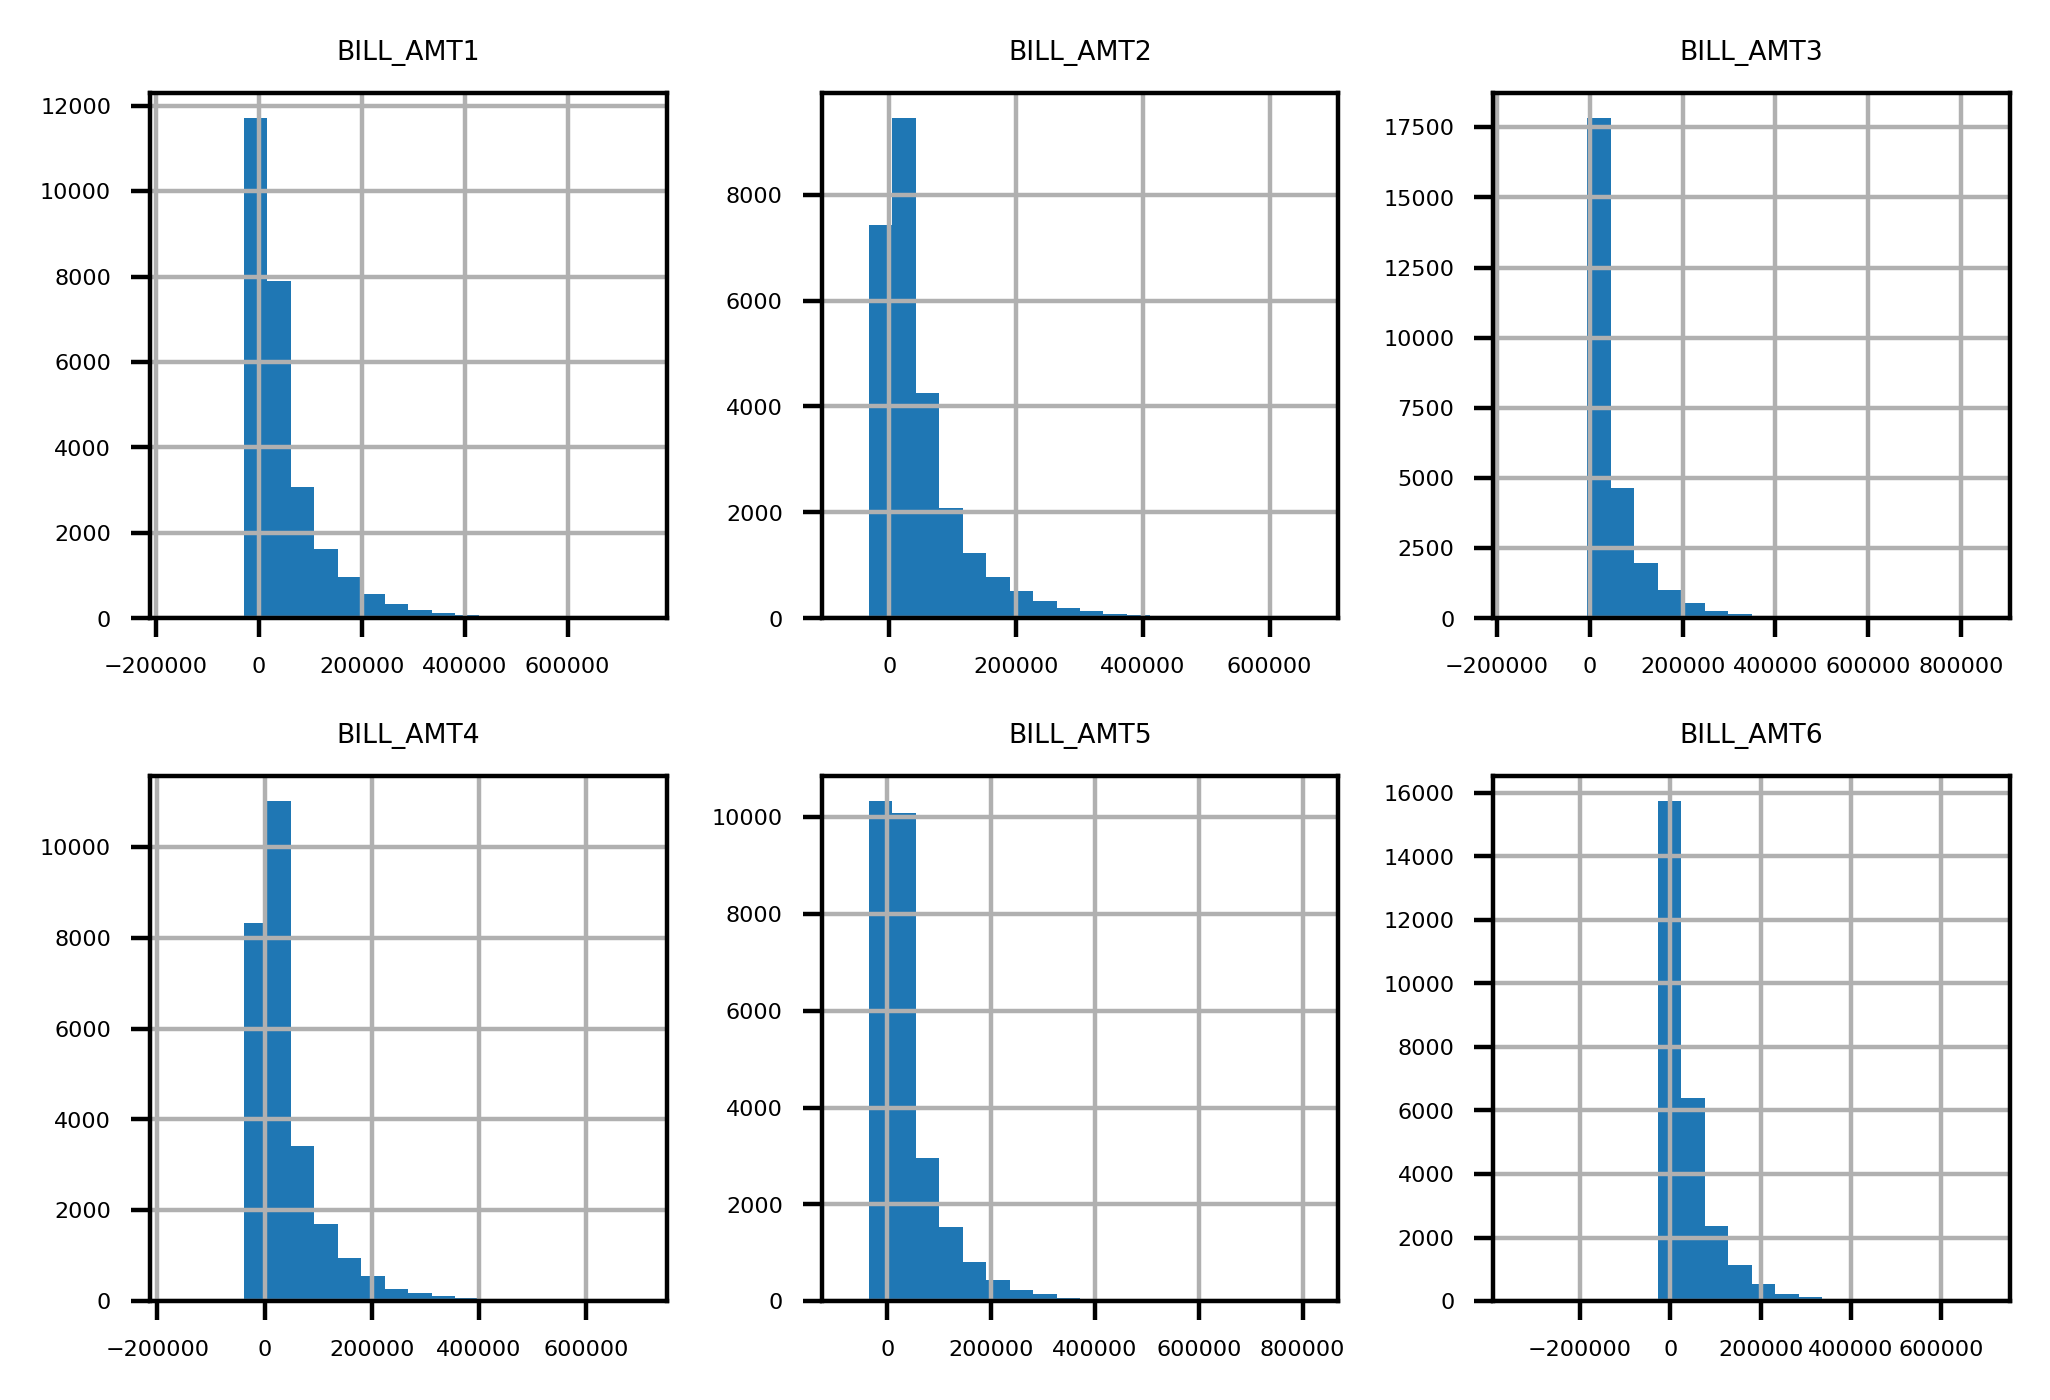

In [65]:
clean_df3[bill_fts].hist(bins=20, layout=(2,3))

The histogram plots make sense in several respects. Most accounts have relatively small bills. There is a steady decrease in the number of accounts as the amount of the bill increases. It also appears that the distribution of billed amounts is roughly similar month to month, so we don't notice any data inconsistency issues as we did with the payment status features

In [66]:
clean_df3[pay_amt_fts].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

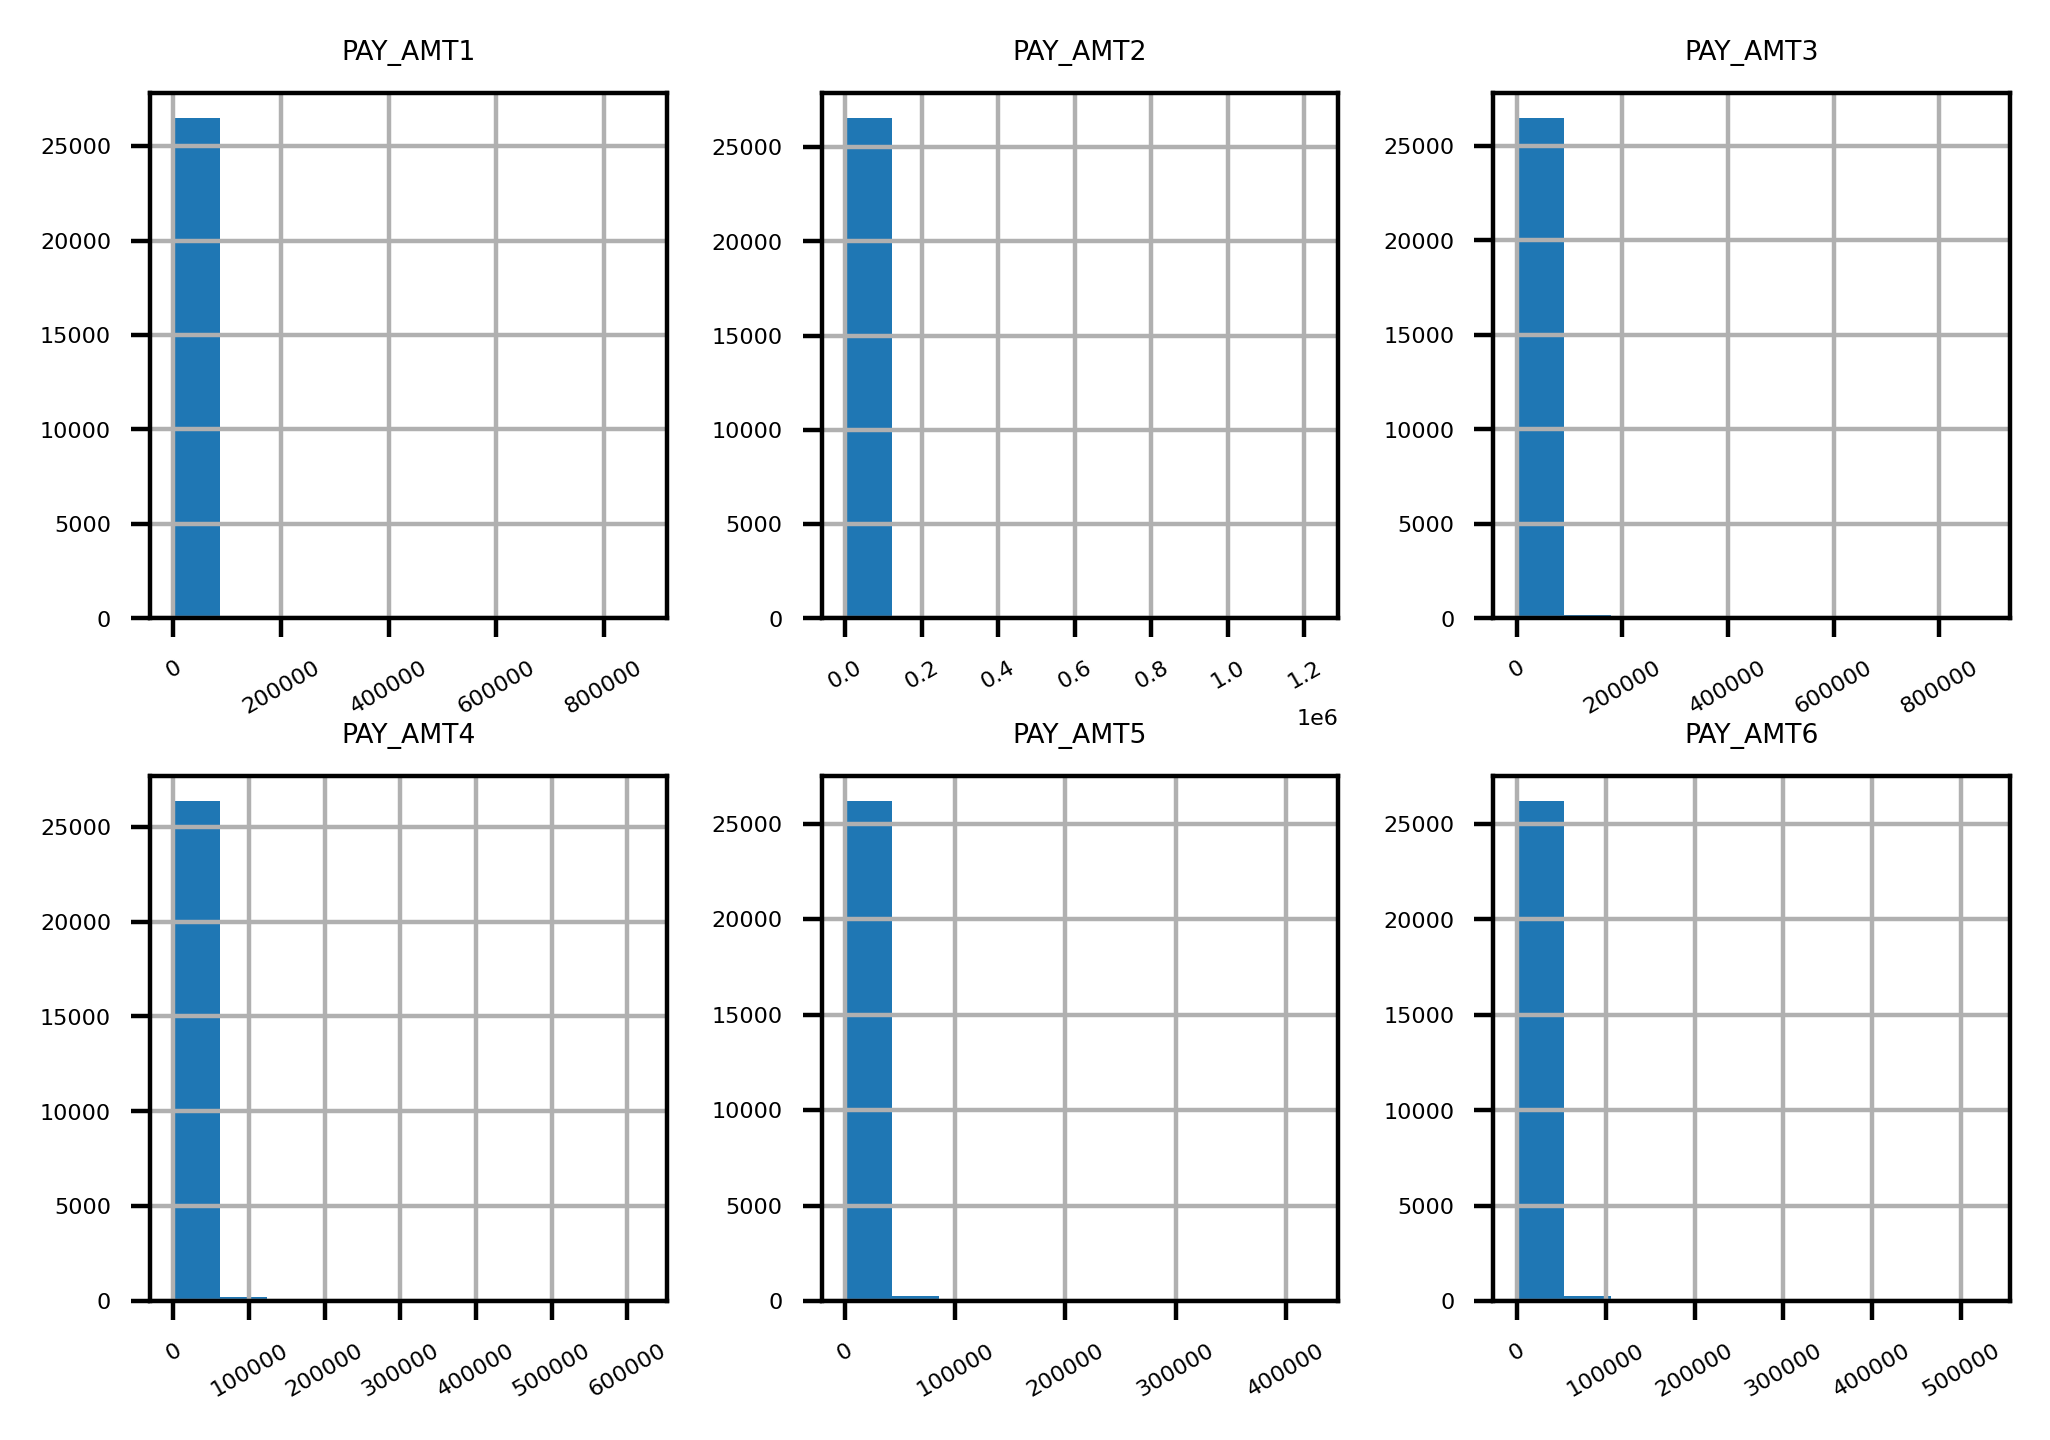

In [67]:
clean_df3[pay_amt_fts].hist(layout=(2,3), xrot=30)

notice how most of the pyt equal to zero. Let's transform logrithmically them to see the non-zero payments

In [68]:
pay_zero = clean_df3[pay_amt_fts] == 0

#not all the pyt is equal to zero as shown below

In [69]:
pay_zero.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [70]:
pay_zero.sum() #how many are zero's

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

We see that a substantial portion, roughly around 20-25% of accounts, have a bill payment equal to 0 in any given month. However, most bill payments are above 0. So, why can't we see them in the histogram? This is due to the range of values for bill payments relative to the values of the majority of the bill payments.

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

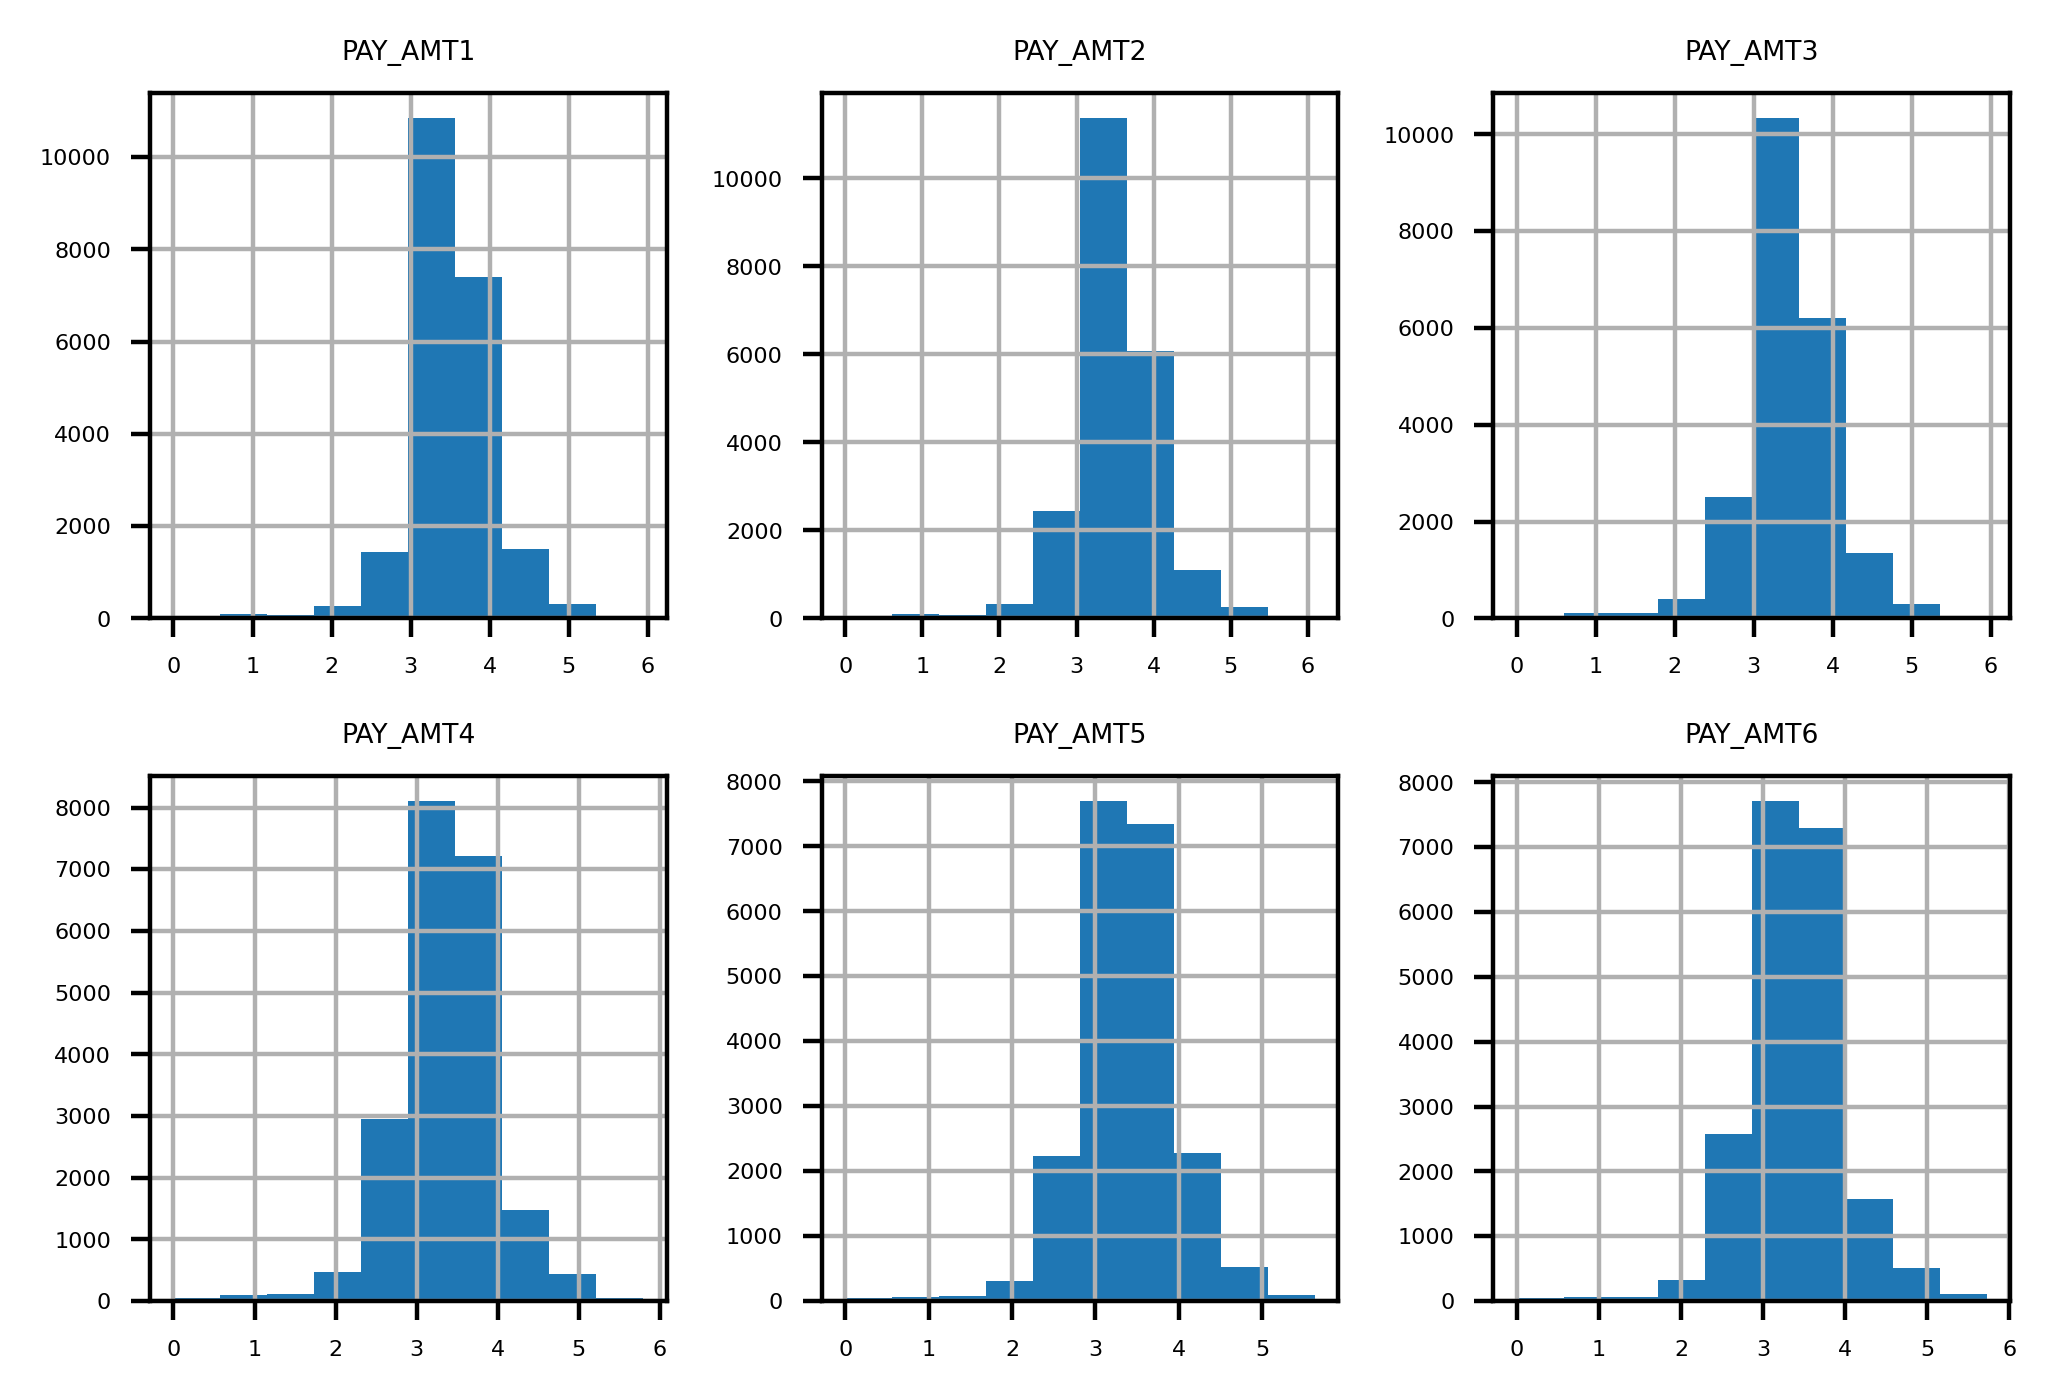

In [71]:
#now let's transform logrithmic to see the rest of the data

clean_df3[pay_amt_fts][~pay_zero].apply(np.log10) \
                                 .hist(layout=(2,3))

### Exploring the Response variable/Target variable

- Default payment next month: 1- YES 0- NO

The critical examination of response variable is ask what is the proportion of the positive class

In [72]:
clean_df3['default payment next month'].mean()

#this shows the average percentage of bank clients that defaulted- 22%

0.2217971797179718

In [73]:
#check the number of samples in each class(0/1)
clean_df3.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

# Modeling the Data with ML- Scikit-learn

#### With few features and the target variable

In this problem we would using a logistic regression which is a classification model

In [74]:
import sklearn 

from sklearn.linear_model import LogisticRegression

###### learning logistic Regression

In [75]:
my_lr = LogisticRegression()

In [76]:
my_lr

LogisticRegression()

In [77]:
#what's happening under hood in logistic regression model:- default parameters

my_new_lr = LogisticRegression(penalty='l2', dual=False,\
                              tol=0.0001, C=1.0,\
                              fit_intercept=True,\
                              intercept_scaling=1,\
                              class_weight=None,\
                              random_state=None,\
                              solver='lbfgs',\
                              max_iter=100,\
                              multi_class='auto',\
                              verbose=0, warm_start=False,\
                              n_jobs=None, l1_ratio=None)

In [78]:
#now imagine if you want to make changes to the default parameters:

my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'

my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

Notice the default options we changed has been implemented in our regression model.

- C is what we can call an hyperparameter of the model and we have change it from 1.0 to 0.1. A hyperparameter is a parameter whose value is used to control the learning process.

- We also specified a solver.

These options specify the way in which the model will be trained.

let's fit this lr to some data.

Supervised learning algorithms rely on labeled data. That means we need
both the features, customarily contained in a variable called **X**, and the corresponding responses, in a variable called **y**.

In [79]:
#Let's use a sample from EDUCATION-10 samples

X = clean_df3['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [80]:
y = clean_df3['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [81]:
#now let's fit

my_new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

While there is no output as it were from the above:- my_new_lr is now a 'trained model'. so we can say my_new_lr has been modified.

We can then use our trained model to make predictions using the features of new samples.

**Let's see**

In [82]:
new_X =clean_df3['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [83]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [84]:
#What's the true values corresponding to these predictions...
#since the data is labelled

clean_df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

**In scikit-learn, there is the concept of using a trained model to make a prediction on new data that the model had never "seen" before. It turns out this is a foundational concept in predictive modeling**. 

*Just like the prototype we created with the education variable and it's responses, we use the trained model by exposing it new data(new features sample) to make predictions*

In our quest to create a model that has predictive capabilities, we need some kind of measure of how well the model can make predictions on data that were not used to fit the model.This is because in fitting a model, the model becomes "specialized" at learning the relationship between features and response on the specific set of labeled data that were used for fitting. While this is nice, in the end we want to be able to use the model to make accurate predictions on new, unseen data, for which we don't know the true value of the labels.

So now we would deliver a trained model, to the end that our clients will then generate a new dataset of features like those we have now, except instead of spanning the period from April to September, they will span from May to October. And our client will be using the model with these features, to predict whether accounts will default in November.

In order to know how well we can expect our model to predict which accounts will actually default in November (which won't be known until December), we can take our current dataset and reserve some of the data we have, with known labels, from the model training process. This data is referred to as ***test data*** and may also be called out-of-sample data since it consists of samples that were not used in training the model. Those samples used to train the model are called training data. The practice of holding out a set of test data gives us an idea of how the model will perform when it is used for its intended purpose, to make predictions on samples that were not included during model training.

Let's see how this is done in our case study: We will use the convenient **train_test_split functionality of scikit-learn to split the data so that 80% will be used for training, holding 20% back for testing**

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split\
                                (clean_df3['EDUCATION']\
                                .values.reshape(-1,1),\
                                clean_df3['default payment next month']\
                                .values, test_size=0.2,\
                                random_state=24)

#notice the test_size is 0.2/20% 
#therefore the training data is auto set to 0.8
#also notice a "random_state" parameter...
#it allows a consistent train/test...
#split. Otherwise, the random splitting procedure would select...
#a different 20% of the data for testing each time the code was run...

In [86]:
#let's examine the shapes of our training and test data. to see 80:20 split

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


Note: The first argument to train_test_split is the features, in this case just EDUCATION, and the second argument is the response. There are four outputs: the features of the samples in the training and test sets, respectively, and the corresponding response variables that go with these sets of features. All this function has done is randomly select 20% of the row indices from the dataset and subset out these features and responses as test data, leaving the rest for training.

Also, it's key to examine if the nature of the data is the same btw these sets(train and test). i.e.**is the fraction of the positive class similar**

let's see:

In [87]:
np.mean(y_train)

0.223102526838873

In [88]:
np.mean(y_test)

0.21657603600225014

The positive class fractions in the training and test data are both about 22%. This is good, as we can say that the training set is representative of the test set.

This implies the classs(yes/no) are not too imbalanced,and the datasets is large.

However, If the dataset were smaller, and the positive class very
rare, it may be that the class fractions would be noticeably different between the training and test sets, or worse yet, there might be no positive samples at all in the test set. ***In order to guard against such scenarios, you could use **stratified sampling**, with the **stratify** keyword argument of train_test_split. This procedure also makes a random split of the data into training and test sets but guarantees that the class fractions will be equal or very similar.

**THE CODING EXPRESSION WOULD BE HAS FOLLOWS:**

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [89]:
log_r = LogisticRegression(C=0.1, class_weight=None, dual=False,
                          fit_intercept=True, intercept_scaling=1,
                          max_iter=100, multi_class='auto', n_jobs=None,
                          penalty='l2', random_state=None,
                          solver='liblinear', tol=0.0001, verbose=0,
                          warm_start=False)

In [90]:
log_r.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [91]:
#store the model predicted labels of the test in a variable
y_pred = log_r.predict(X_test)

In [92]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
#assessing the quality of these prediction
#first determine the accuracy of the model

is_correct =y_pred == y_test

In [94]:
np.mean(is_correct)

0.7834239639977498

This indicates that the model is correct 78% of the time

In [95]:
#we could determine the above accuracy in a diff way
#using the score method

log_r.score(X_test, y_test)

0.7834239639977498

In [96]:
#we could also use sklearn metrics library which includes...
#many model performance, such as accuracy

from sklearn import metrics

In [97]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

#####  interpretation

From here we can quickly say our model is doing well; since it predicted 78%. However, we must recall that total % of positives(yes) was 22% leavng a 78%(negative). In otherwords, it is very possible that, the model would probably always predict more of the negative class=78%. Hence 78% may not really show the accuracy of the model and may not be useful.

So because of this, we can adopt other binary classification metrics that's shows us how the model is performing for negartive and positive seperately han the accuracy of prediction across all samples,

We can use a **"CONFUSION MATRIX"**; from which we would now draw out the accuracy metric.

***Let see:***

In [98]:
#learning it manually-before using scikit-learn

#number of positives samples
#p = is the number of samples in the positive class in the test data
#TP = is the number of true positives

p = sum(y_test)
p

1155

In [99]:
#number of true positives: These are samples where the true label is 1...
#and the prediction is also 1

TP = sum(  (y_test==1) & (y_pred==1)  ) 
TP

#The true positive rate is the proportion of true positives to positives.. 
#which of course would be 0 here

0

In [100]:
#Obtain the TPR
#TPR = True positive rate

TPR = TP/p
TPR

0.0

In [101]:
#doing the same for false negatives: These are samples where the true label 
#was 1  and the prediction was 0
#FN = false negative

FN = sum( (y_test==1) & (y_pred==0) )
FN

1155

In [102]:
#obtain the FNR
#FNR = false negative rate

FNR = FN/p
FNR

1.0

First, we can confirm that they sum to 1. This fact is easy to see because the TPR= 0 and the FPR = 1. What does this tell us about our model? On the test set, ***at least for the positive samples, the model has in fact acted as a majority-class null model. Every positive sample was predicted to be negative, so none of them was correctly predicted.***

In [103]:
#Let see true negative rate(TNR) and false positive rate(FPR)
#number of negative samples
N = sum(y_test==0)
N

4178

In [104]:
TN = sum( (y_test==0) & (y_pred==0) )
TN

4178

In [105]:
FP = sum((y_test==0) & (y_pred==1))
FP

0

In [106]:
TNR = TN/N
FPR = FP/N

print('The true negative rate is {} and the false positve rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positve rate is 0.0


our model behaves exactly like the majority-class null model for all samples, both positive and negative. It's clear we're going to need a better model.

In [107]:
#using sklearn

metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

Note that in scikitlearn,
the true class is along the vertical axis and the predicted class is along the
horizontal axis of the confusion matrix,

### How does logistic regression make prediction ?

One thing to understand about how logistic regression works is that the raw
predictions – in other words, the direct outputs from the mathematical equation that
defines logistic regression – are not binary labels. They are actually probabilities on a
scale from 0 to 1

These probabilities are only transformed
into binary predictions through the use of a threshold. The threshold is the
probability above which a prediction is declared to be positive, and below which it is
negative. **The threshold in scikit-learn is 0.5.** This means any sample with a predicted
probability of at least 0.5 is identified as positive, and any with a predicted probability
< 0.5 is decided to be negative. However, we are free to use any threshold we want.
In fact, choosing the threshold is one of the key flexibilities of logistic regression, as
well as other machine learning classification algorithms that estimate probabilities of
class membership.

**let's see**

In [108]:
y_pred_proba = log_r.predict_proba(X_test)
y_pred_proba
#these are probabilities of prediction(either yes/no) scaled btw 0 and 1

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

Notice that there
are two columns. This is because there are two classes in our classification
problem: negative and positive. Assuming the negative labels are coded as 0 and
the positives as 1, as they are in our data, scikit-learn will report the probability of
negative class membership as the first column, and positive class membership as
the second.

Since the two classes are mutually exclusive and are the only options, the sum of
predicted probabilities for the two classes should equal 1 for every sample. Let's
confirm this.

In [109]:
#use np.sum over the first dimension (columns) 
#to calculate the sum of probabilities for each sample
prob_sum = np.sum(y_pred_proba, 1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [110]:
#check the array shape

prob_sum.shape

(5333,)

In [111]:
#show all the unique array elements
np.unique(prob_sum)

array([1.])

since the class probabilities sum is equal to 1, its sufficient to consider the second column, the predicted probability of positive class membership

In [112]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

Text(0, 0.5, 'Number of samples')

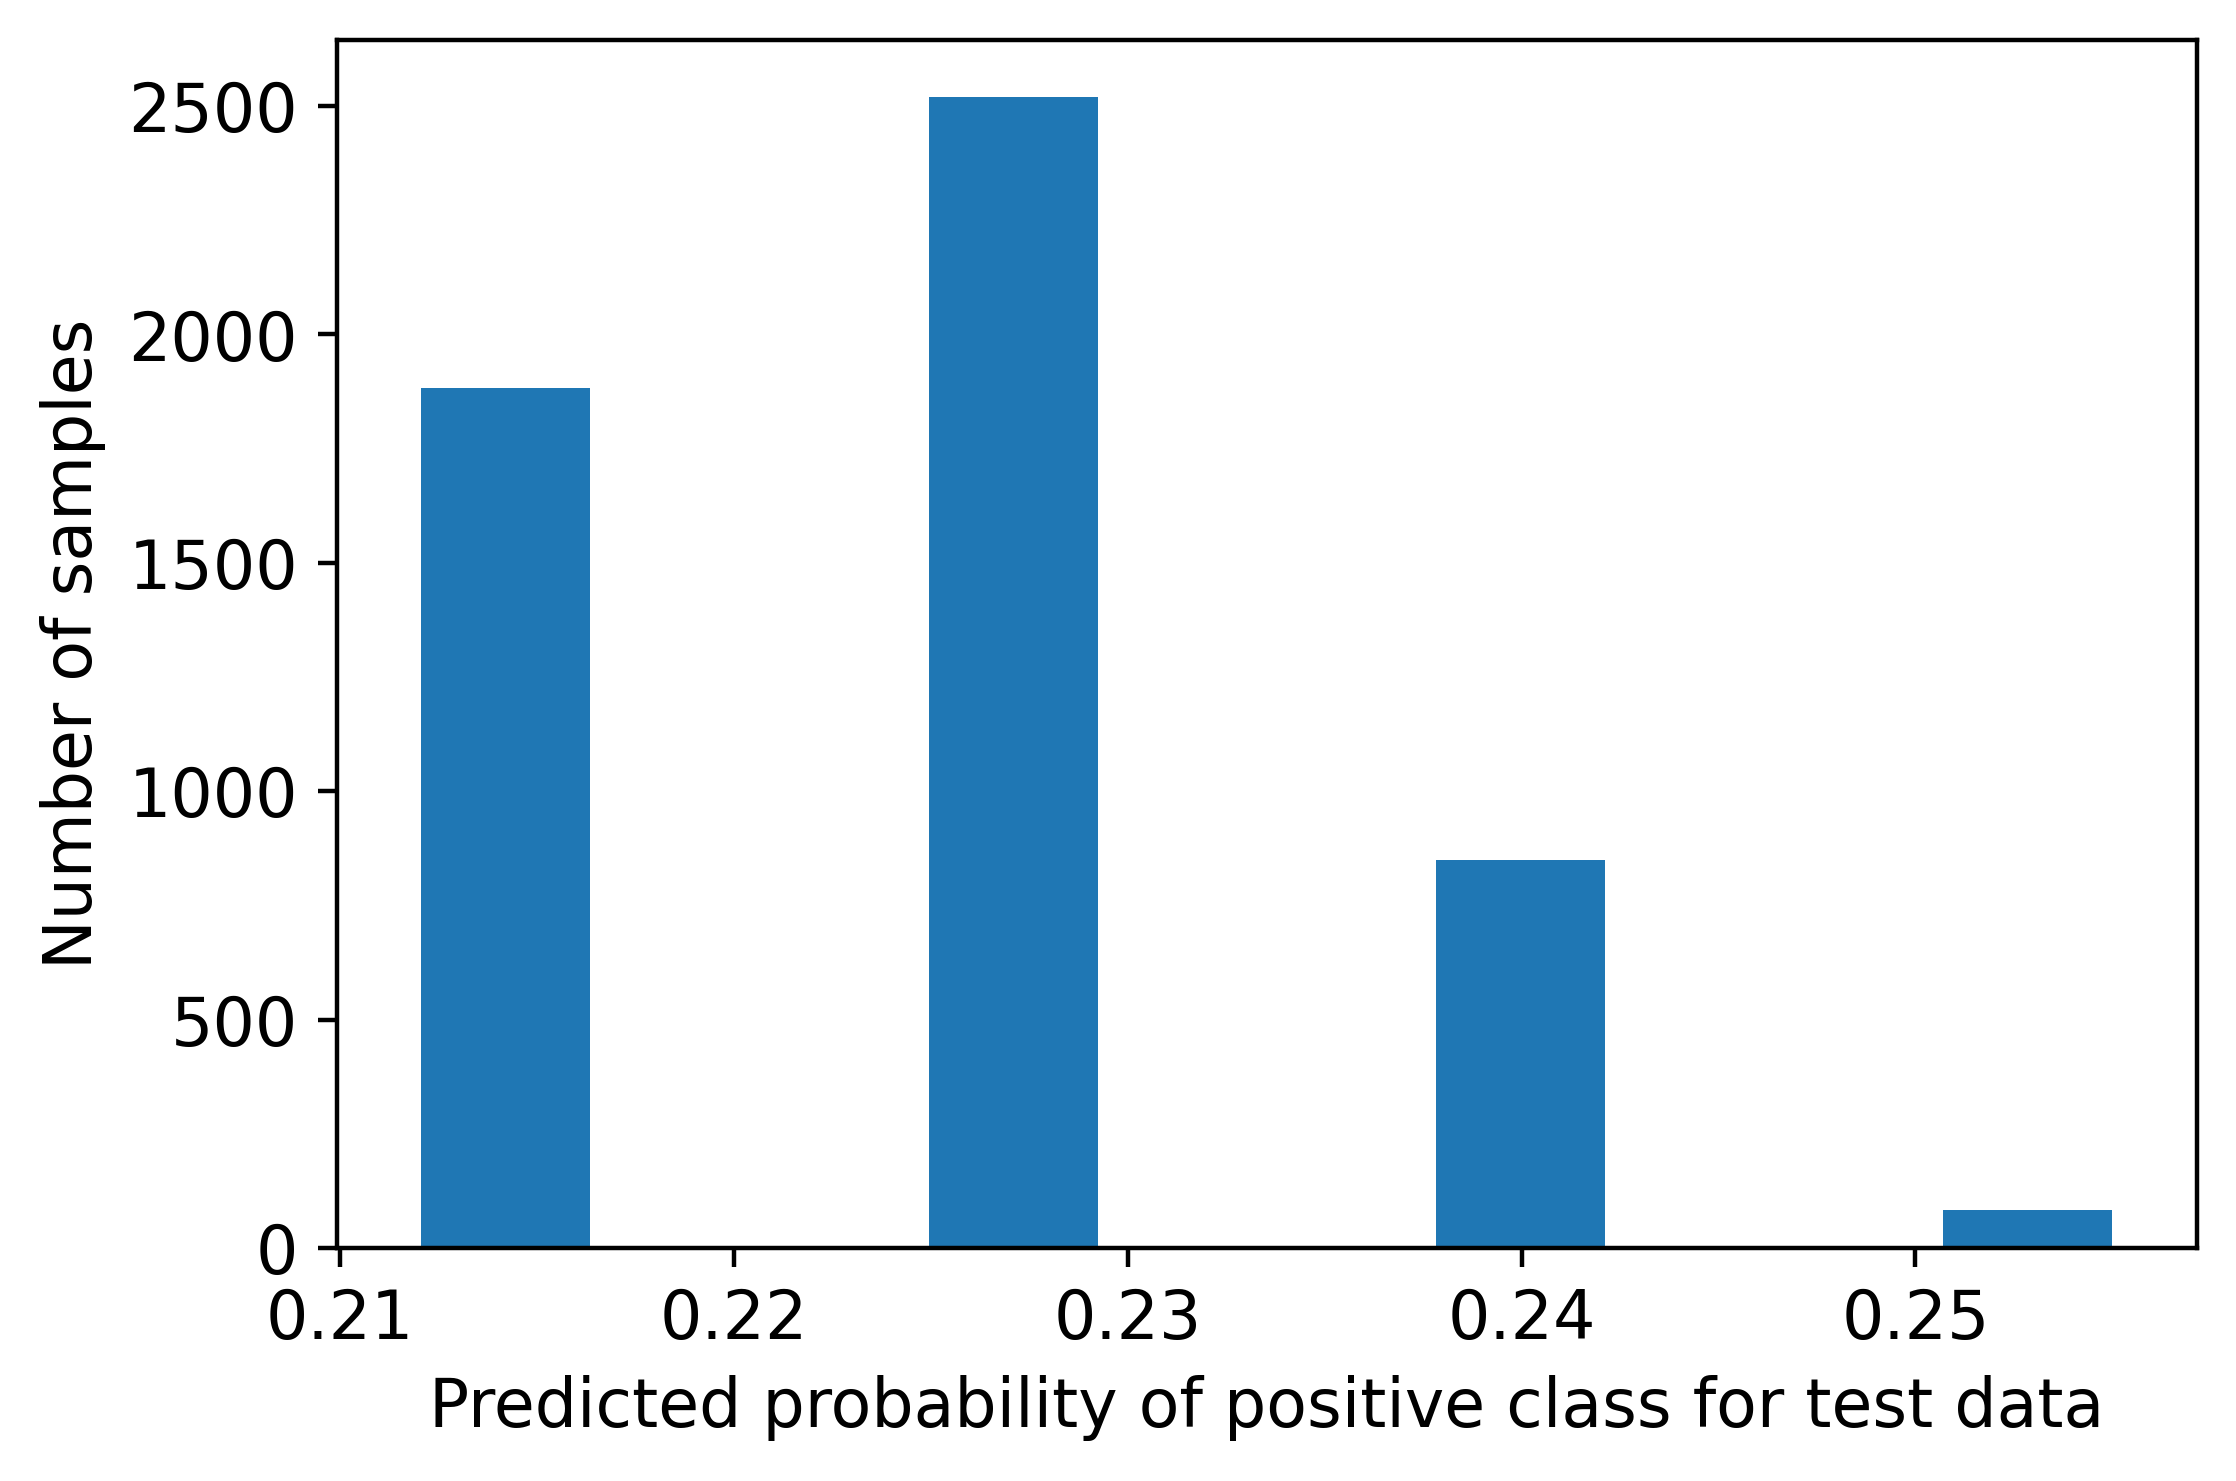

In [113]:
#let's plot the predicted probabilities with Histogram
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class '\
           'for test data')
plt.ylabel('Number of samples')

Notice that in the histogram of probabilities, there are only four bins that actually
have samples in them, and they are spaced fairly far apart. This is because
there are only four unique values for the **EDUCATION** feature, which is the only
feature in our example model.

Also, notice that all the predicted probabilities are below 0.5. This is the reason
every sample was predicted to be negative, using the 0.5 threshold. We can
imagine that if we set our threshold below 0.5, we would get different results.

let's see the hist using  a stacked hist with the threshold of 0.5 to know the positive and negative

In [114]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

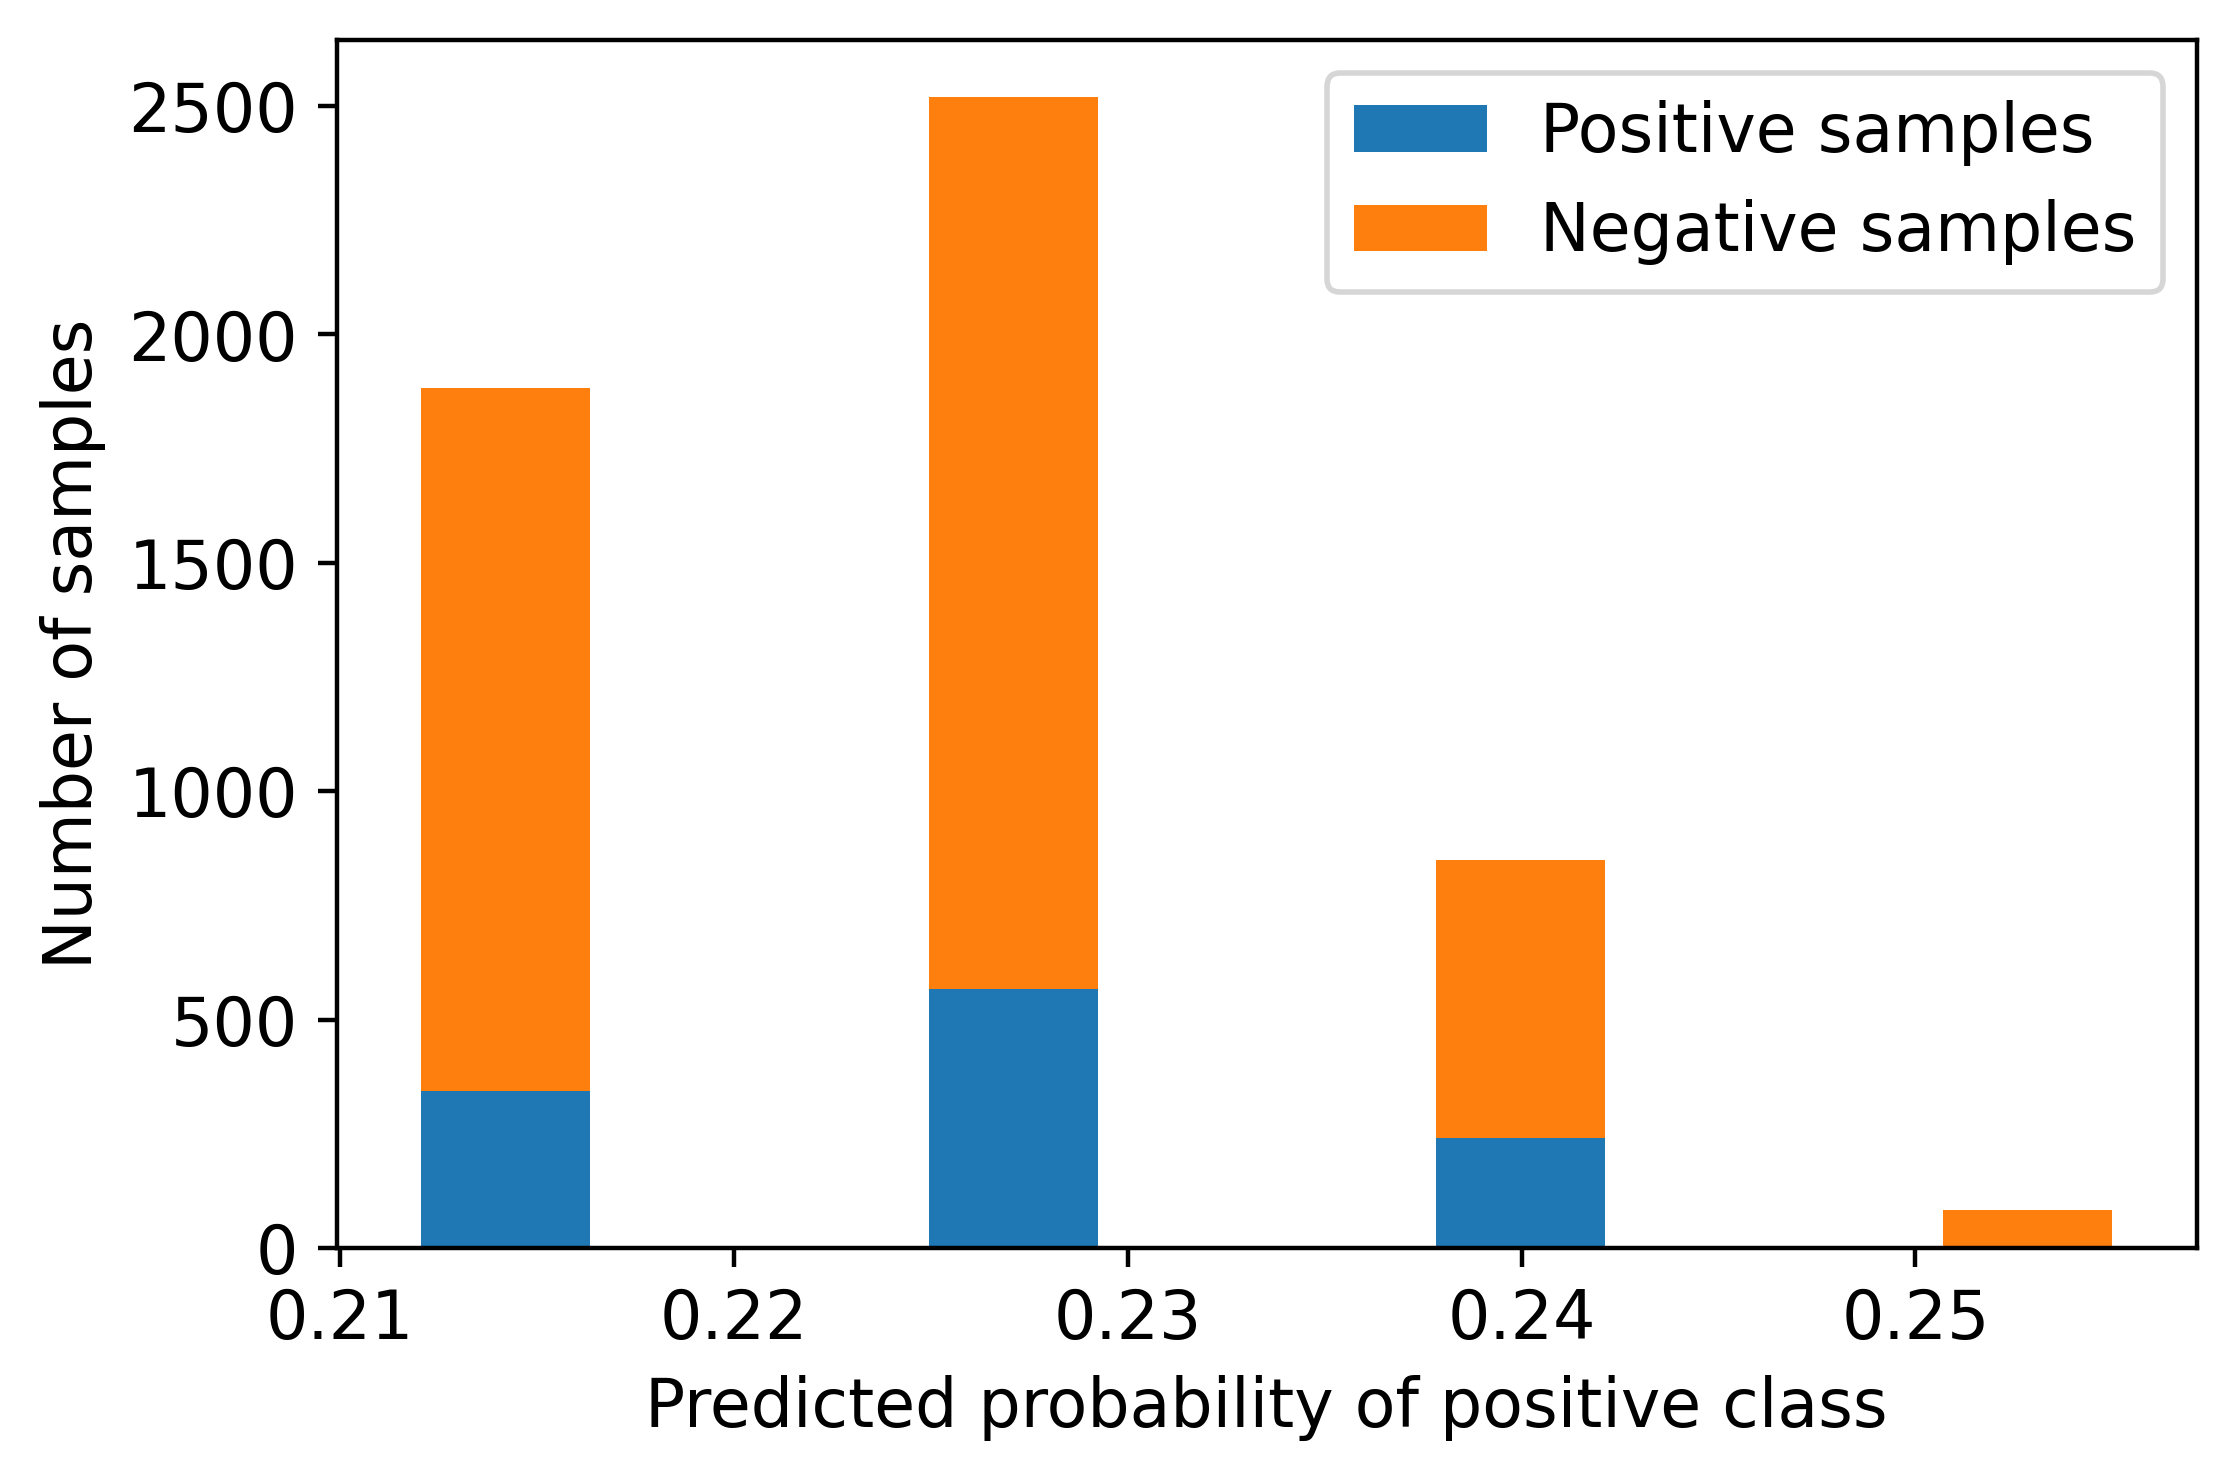

In [115]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba],\
histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

The plot shows us the true labels of the samples for each predicted probability.

Now if we changed the threshold to 0.25, any sample above the predicted probablity would be classified as positive.

### Advanced classification metrics

**How do decide the right threshold ? without incurring to many false positives**

We can use Receiver operating characteristic(ROC)

In [116]:
FPR,TPR, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

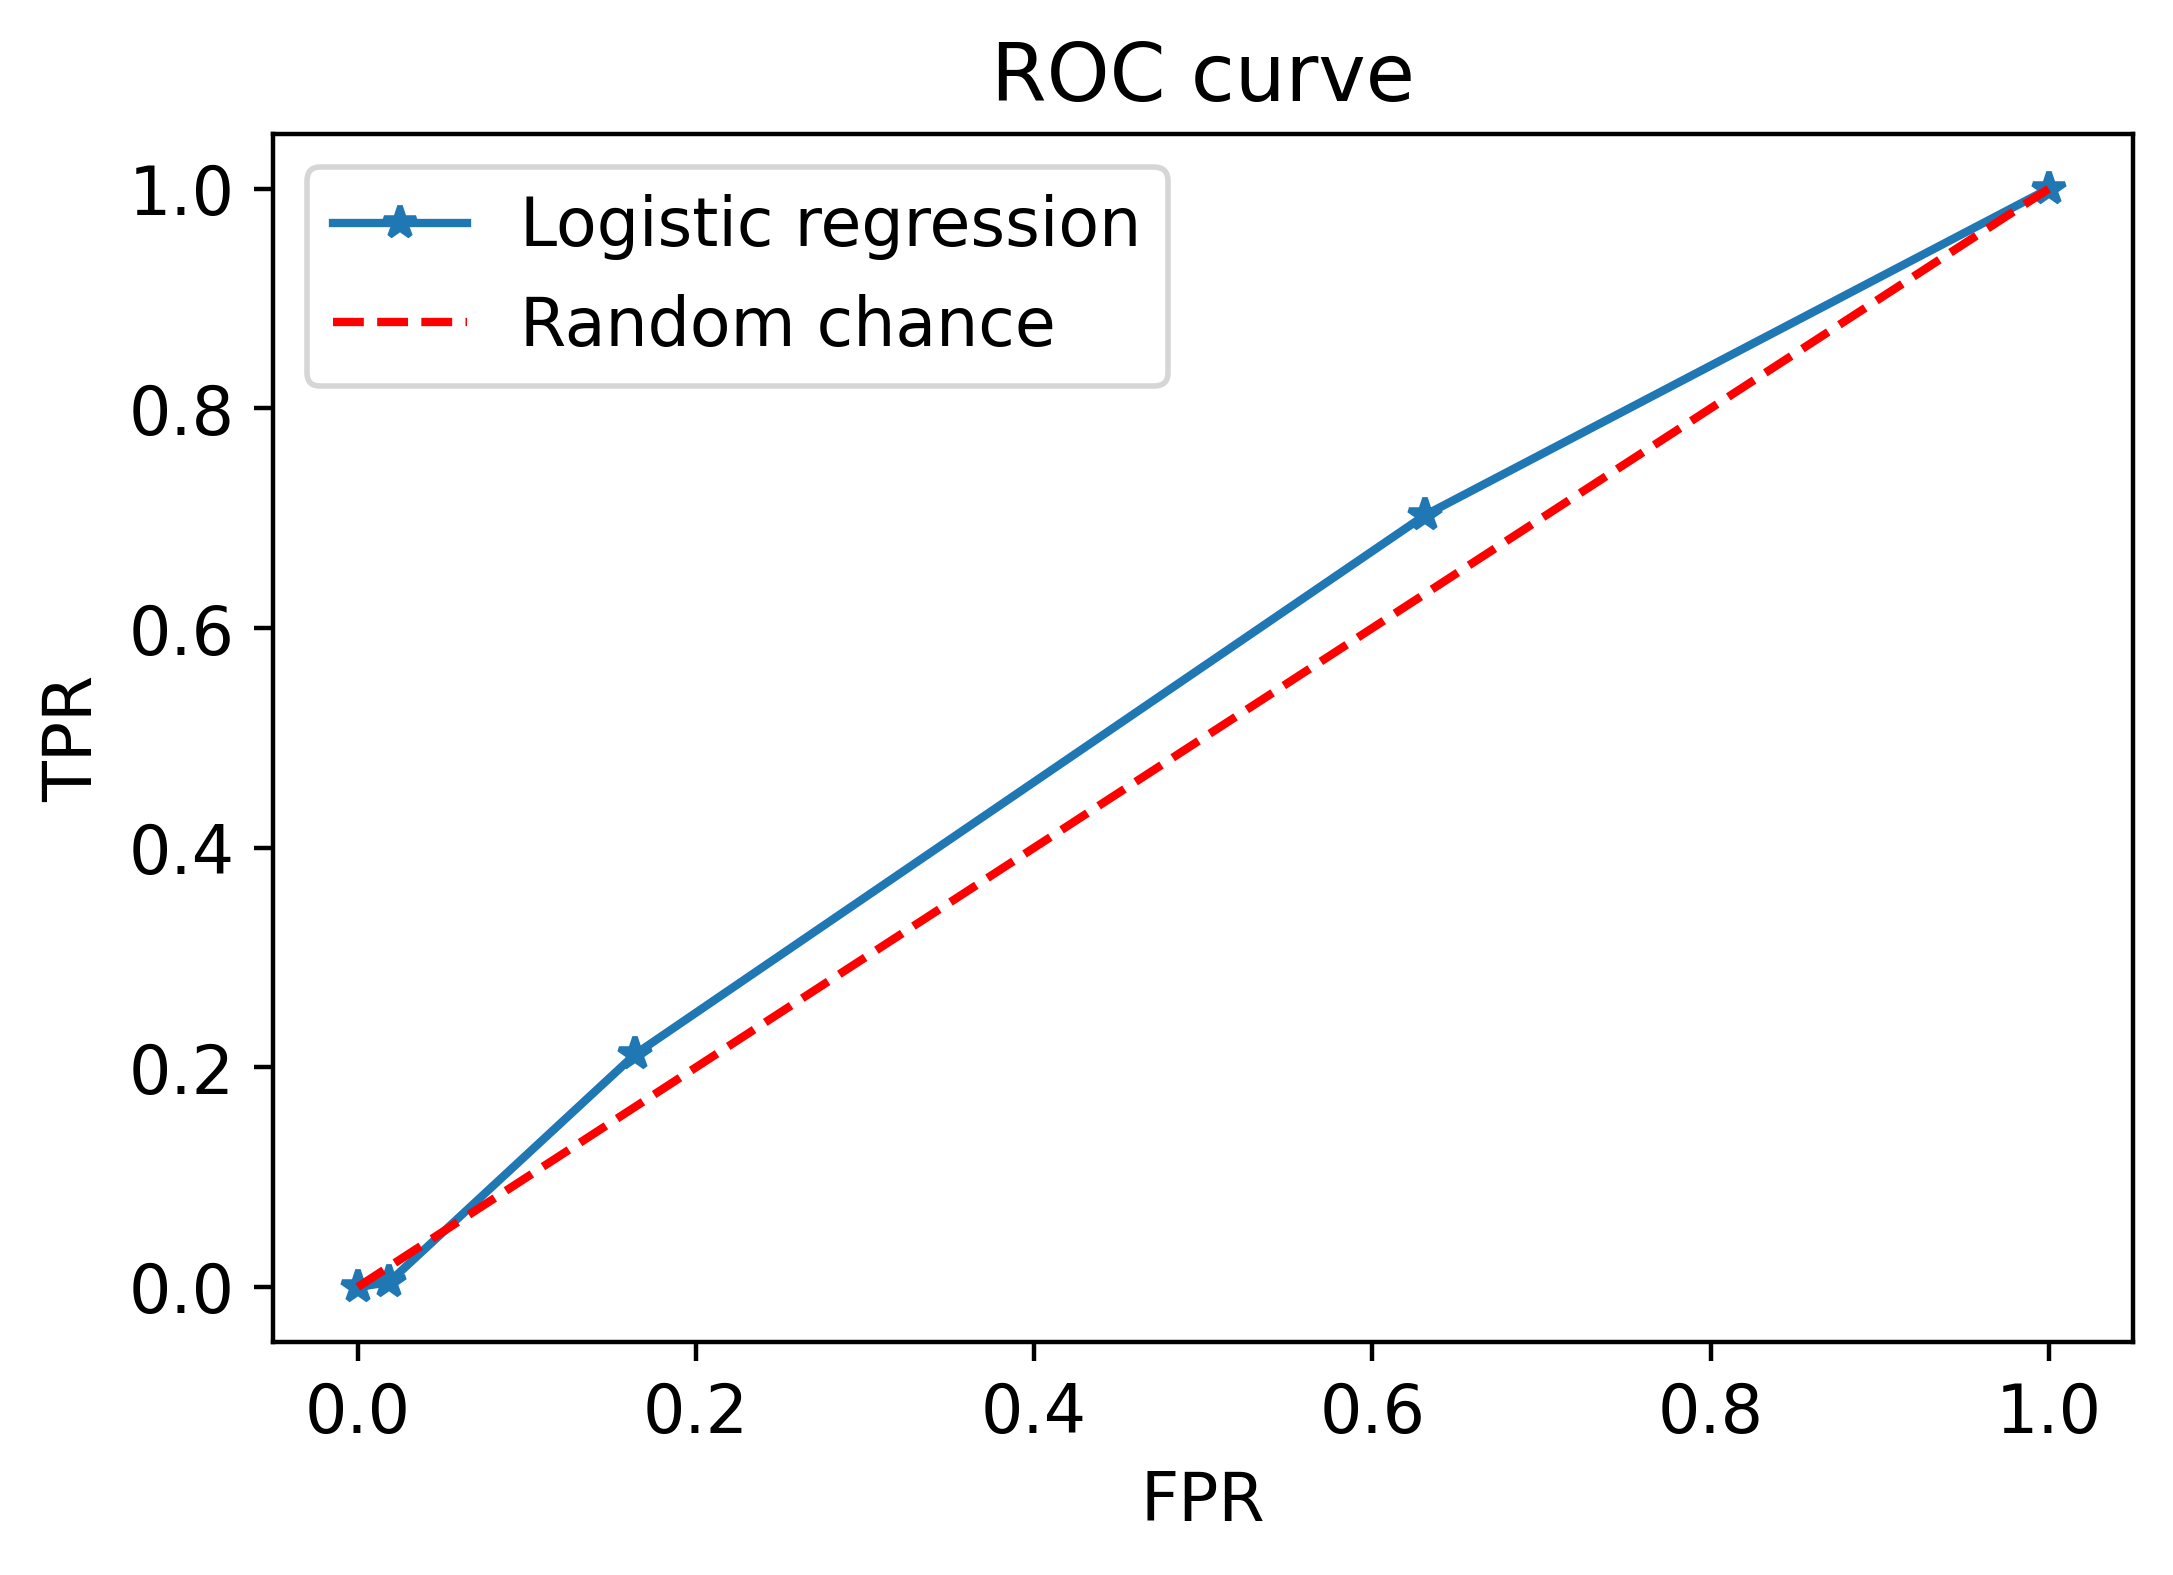

In [117]:
plt.plot(FPR, TPR, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [118]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

Notice that the first threshold is actually above 1; practically speaking, it just needs to
be a threshold that's high enough that there are no positive classifications.(false positives)

**AUC**

This is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In [119]:
#we can also know the quality of a classifer using ROC AUC
#AUC:- Area under the curve

metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

The ROC AUC for the logistic regression is pretty close to 0.5, meaning it's not a very
effective classifier

This may not be surprising, considering we have expended no
effort to determine which features out of the candidate pool are actually useful at this
point. We're just getting used to model fitting syntax and learning the way to calculate
model quality metrics using a simple model containing only the EDUCATION feature.

**Another classification metric is PRECISION:- Precision precision measures the ratio of
positive predictions that are correct to all positive predictions. It is also called positive predictive value**

- This diagnostic is useful over a range of thresholds.
- Precision gives a more critical assessment of the quality of a classifier than the ROC

There is a convenient function in scikit-learn to calculate
precision, together with recall (also known as the TPR), over a range of thresholds:
***metrics.precision_recall_curve***. Precision and recall are often plotted
together to assess the quality of positive predictions as far as what fraction are
correct, while at the same time considering what fraction of the positive class a model
is able to identify.

In [120]:
precision, recall, thresh_3 = metrics.precision_recall_curve(y_test, pos_proba)

(0.0, 1.0)

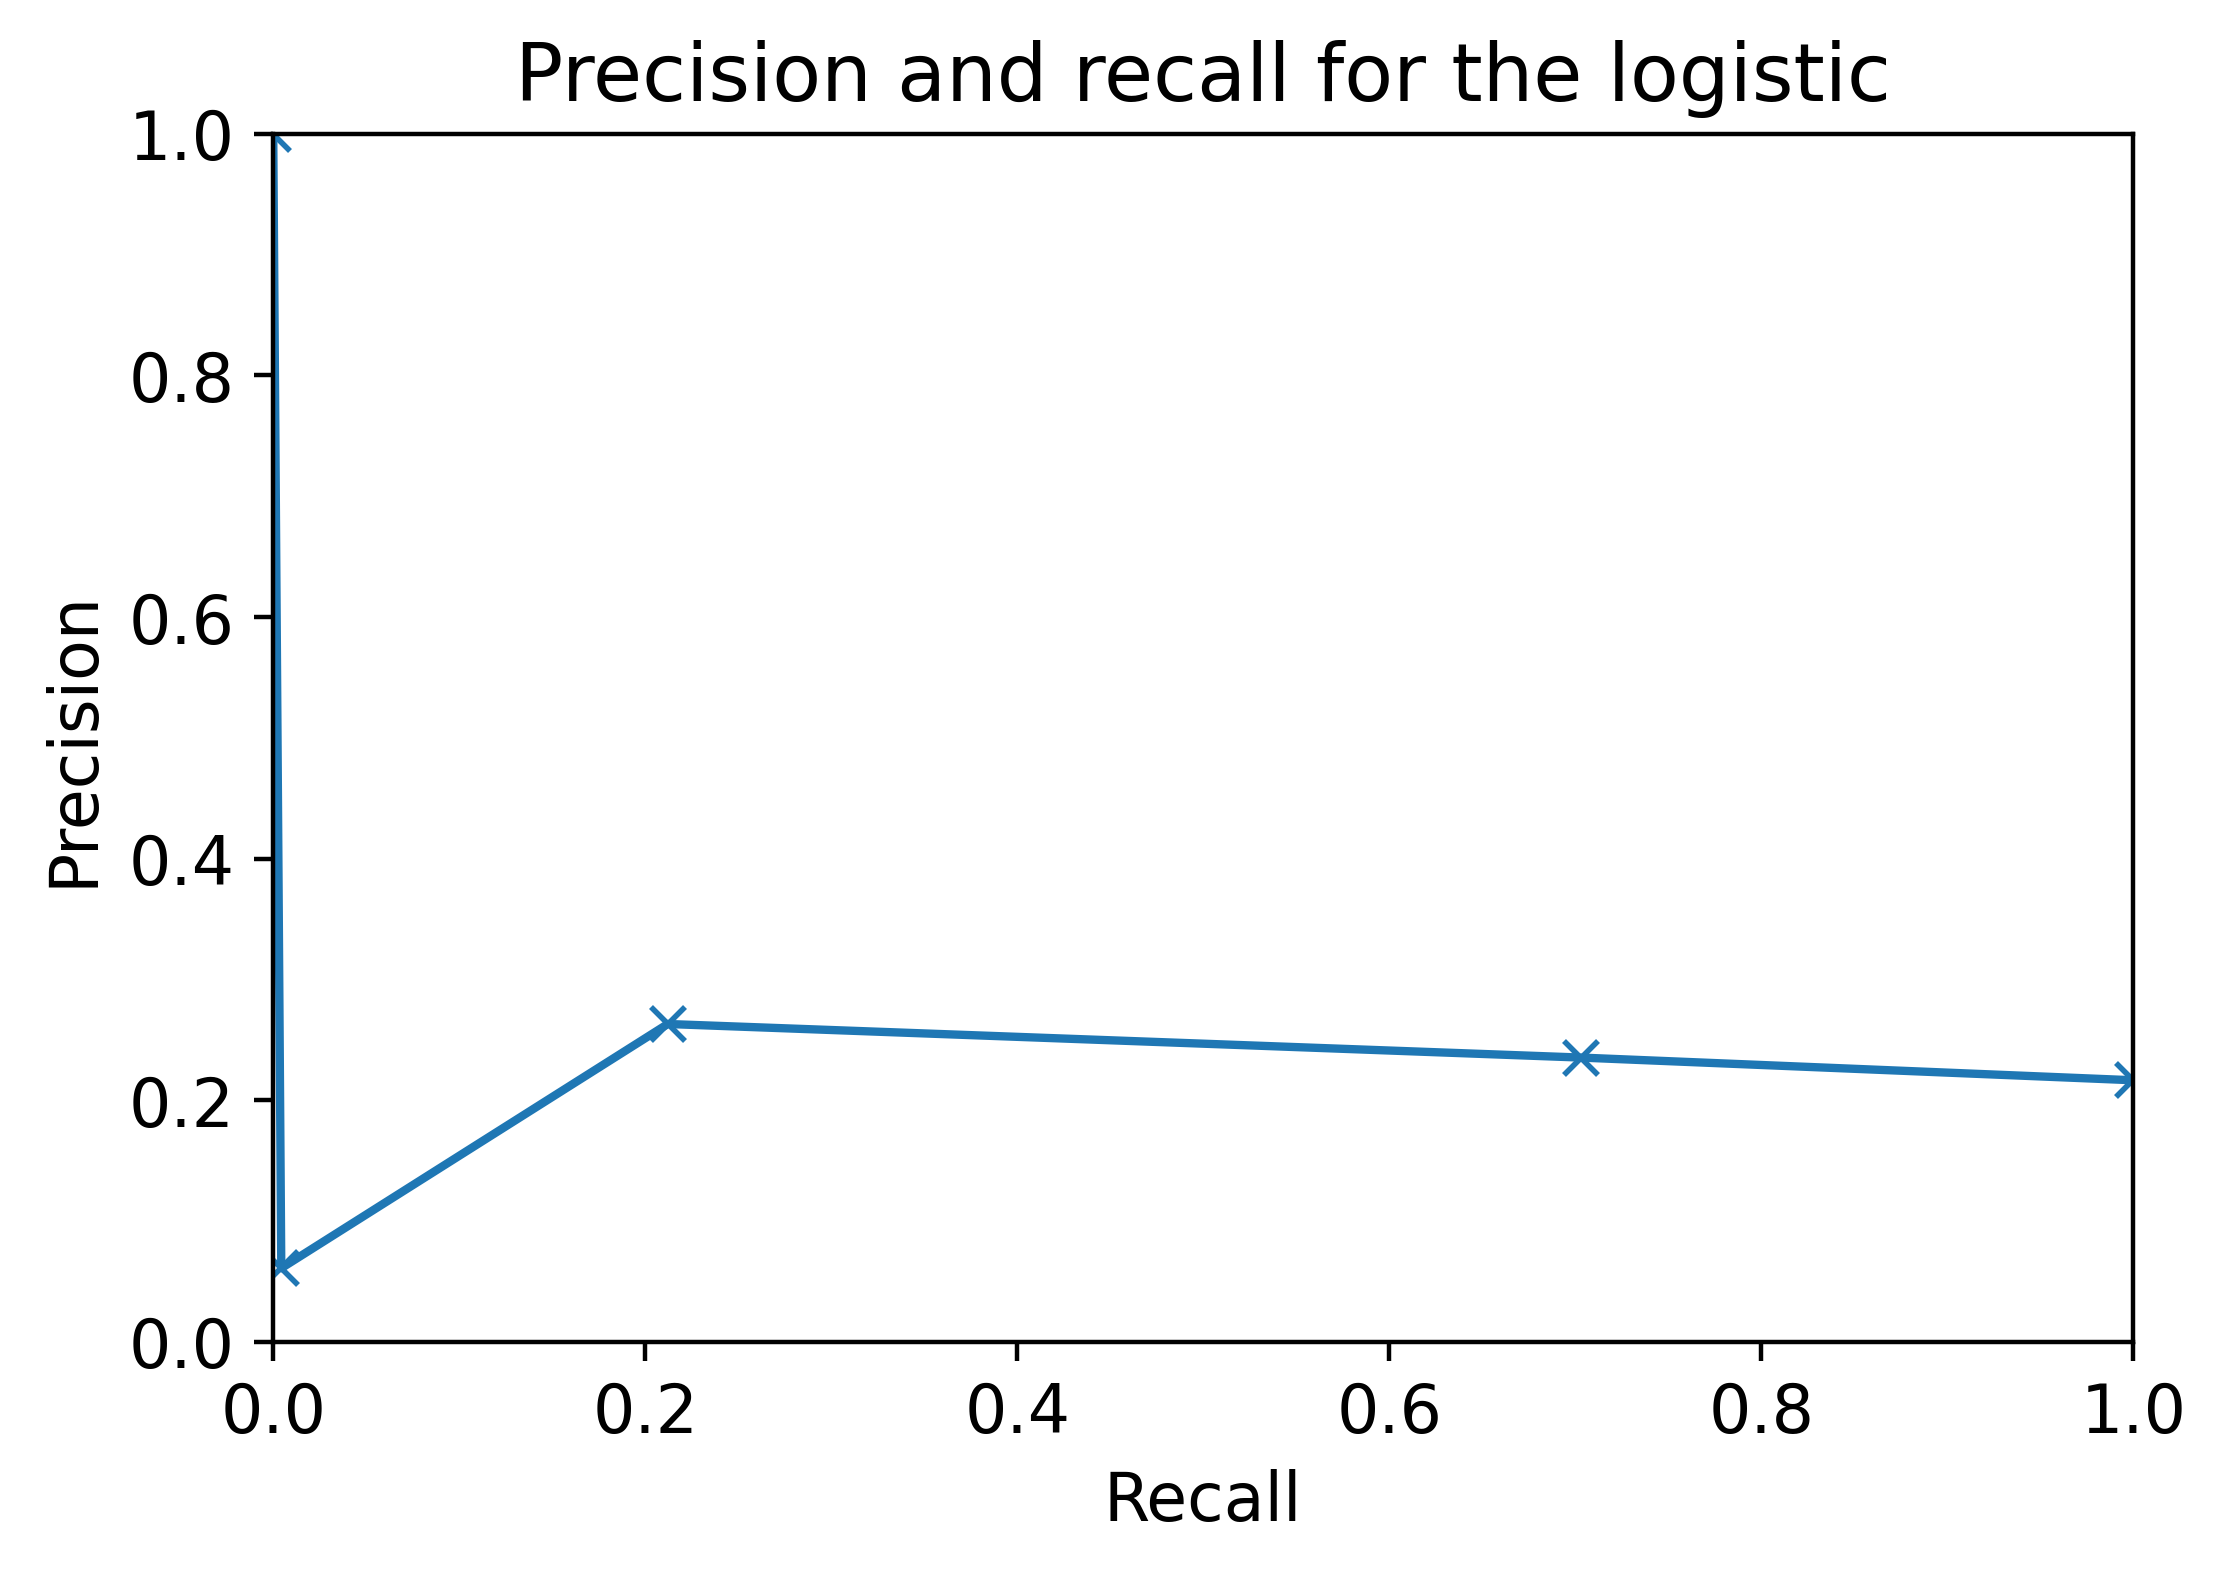

In [121]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [122]:
metrics.auc(recall, precision)

0.22544274282968607

### Logistic Regression with a New Feature and Creating a Precision-Recall Curve

In [123]:
X_train2, X_test2, y_train2, y_test2 = train_test_split\
                                       (clean_df3['LIMIT_BAL']\
                                        .values.reshape(-1,1),\
                                        clean_df3['default payment next month']\
                                        .values, test_size=0.2,\
                                        random_state=24)

In [124]:
log_r.fit(X_train2, y_train2)

LogisticRegression(C=0.1, solver='liblinear')

In [125]:
#create the array of pred probabilities for the test data

y_test2_pred_prob = log_r.predict_proba(X_test2)

y_test2_pred_prob

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [126]:
#calcalute the ROC AUC using the pred probabilities

metrics.roc_auc_score(y_test2, y_test2_pred_prob[:,1])

0.6201990844642832

In comparison with the ROC AUC of education, this is higher. This may be because now we are using a feature that has something
to do with an account's financial status (credit limit), to predict something else
related to the account's financial status (whether or not it will default), instead of
using something less directly related to finances.

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

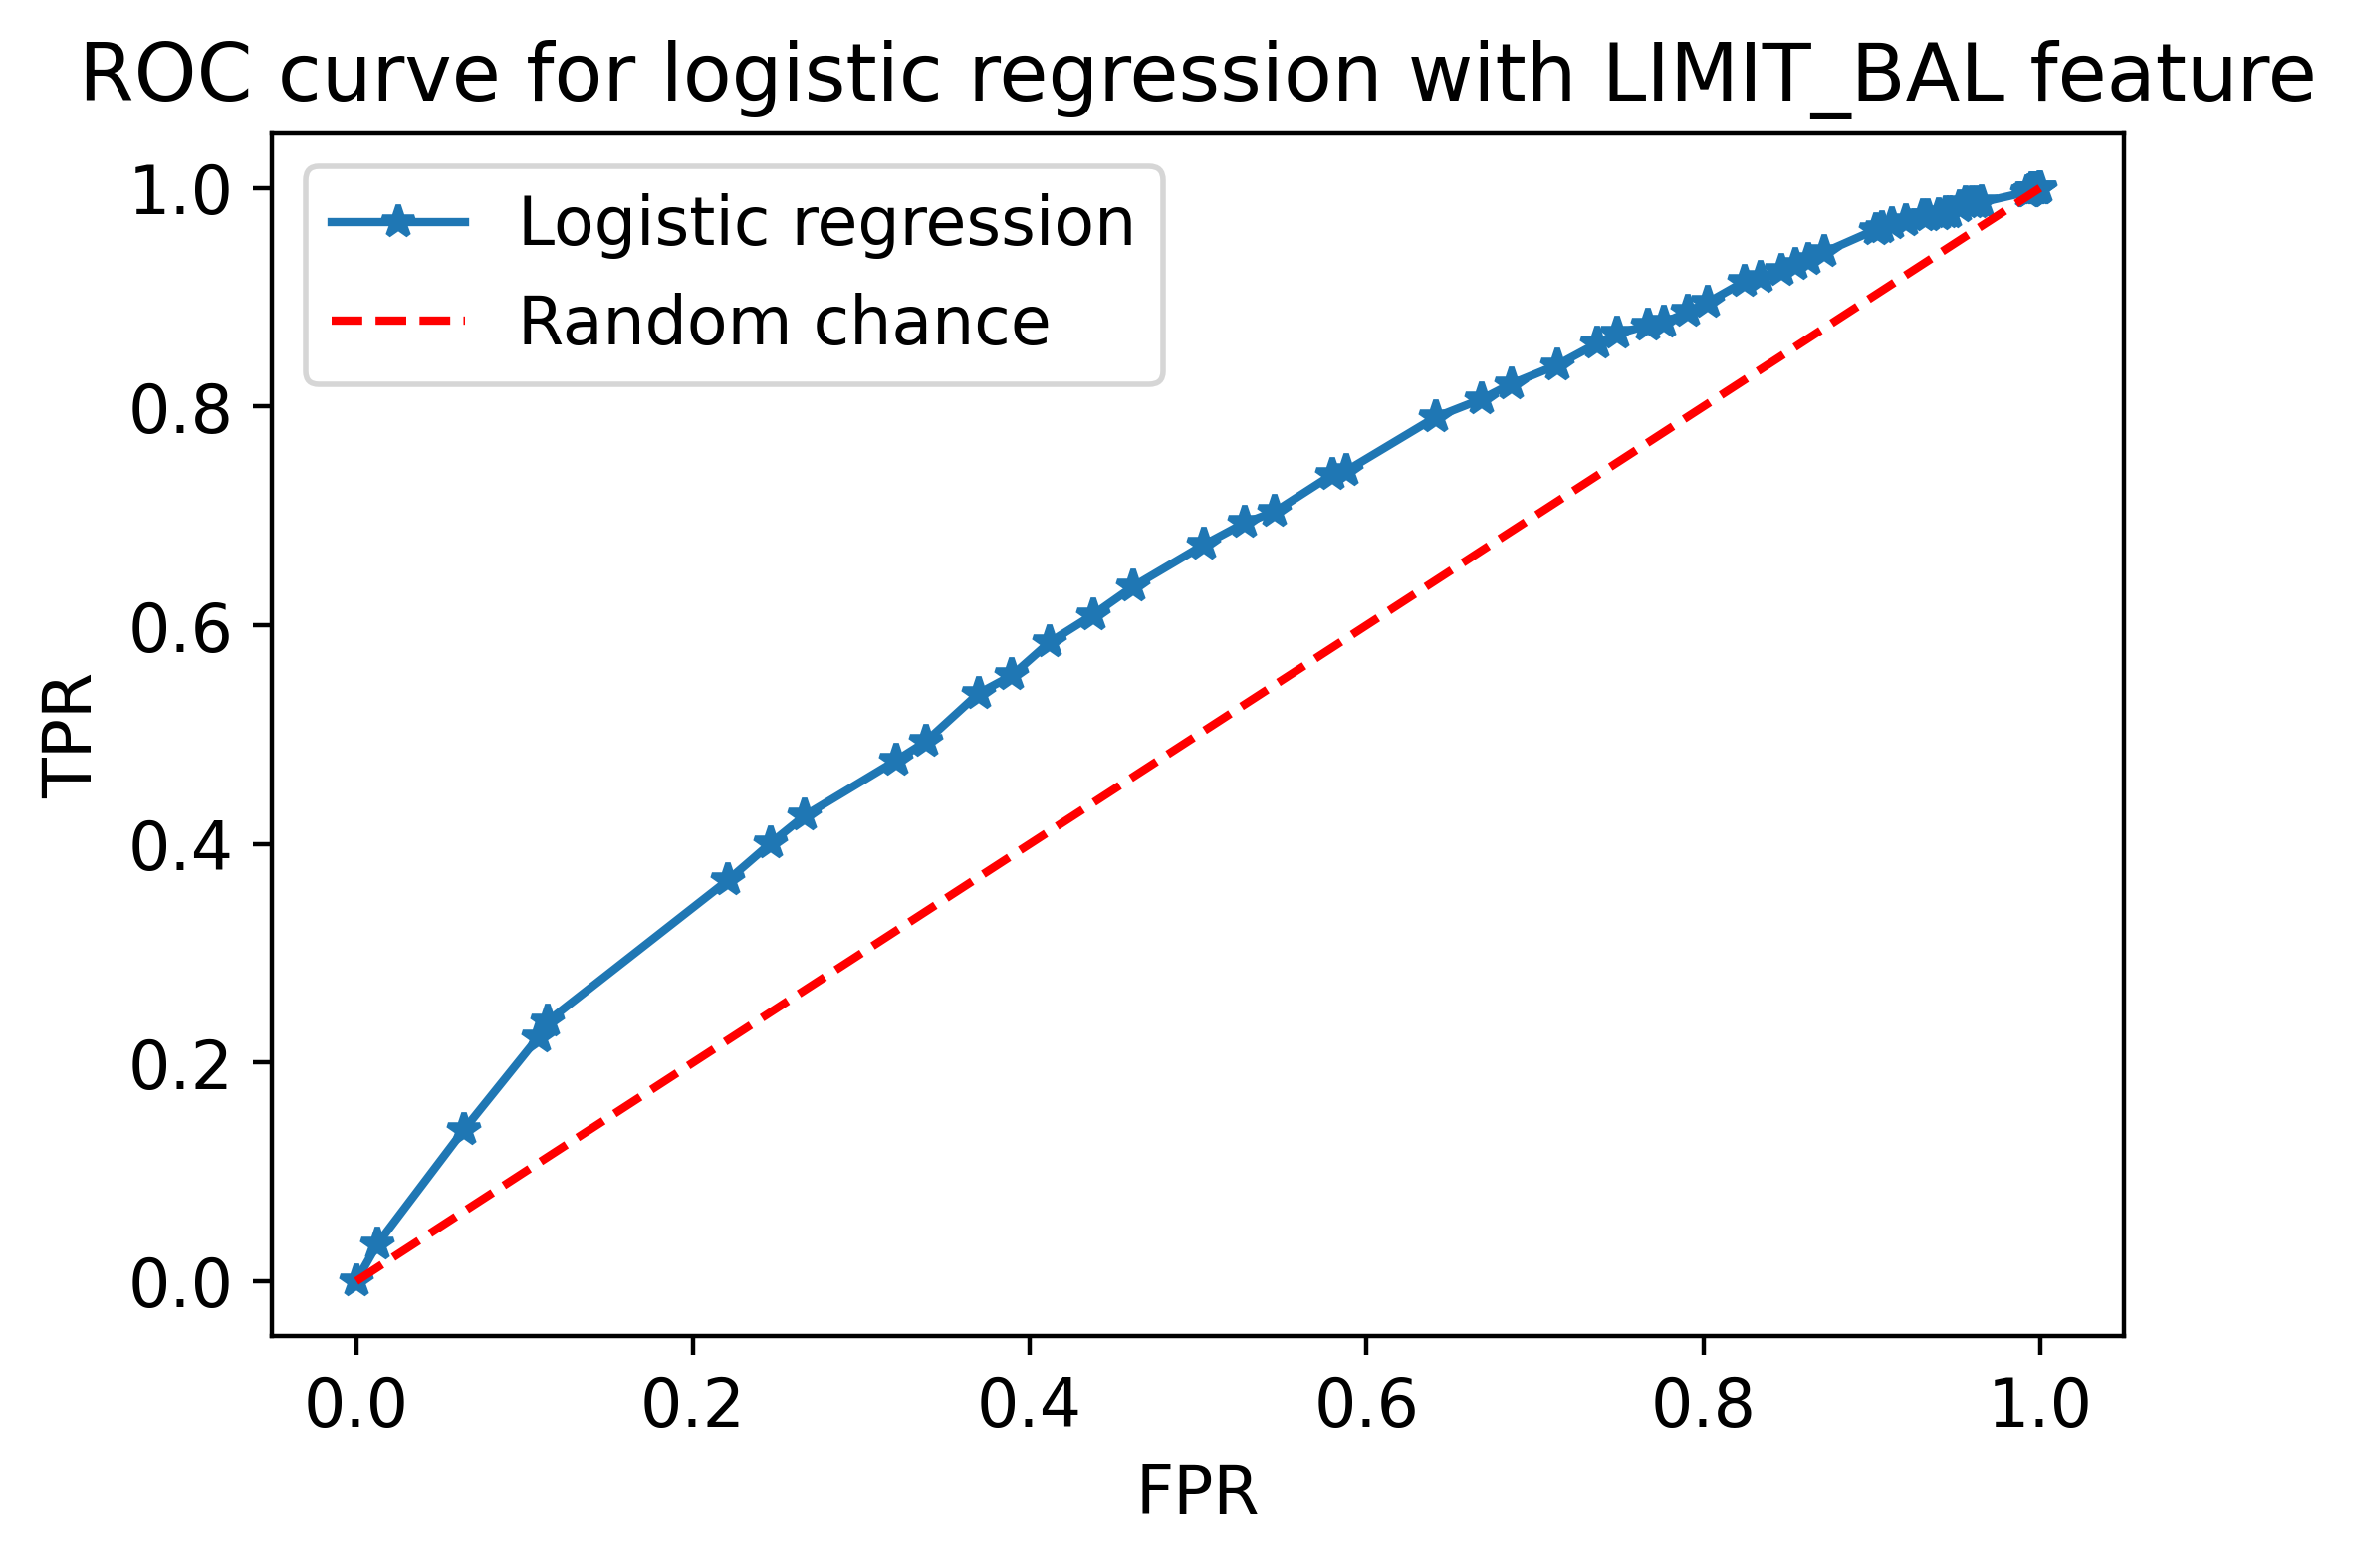

In [127]:
#plot the roc curve

FPR2,TPR2, thresholds2 = metrics.roc_curve(y_test2, y_test2_pred_prob[:,1])

plt.plot(FPR2, TPR2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [128]:
thresholds2

array([1.48298465, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

This looks a little closer to an ROC curve that we'd like to see: it's a bit further
from the random chance line than the model using only EDUCATION. Also
notice that the variation in pairs of true and false positive rates is a little
smoother over the range of thresholds, reflective of the larger number of distinct
values of the **LIMIT_BAL feature**.

In [129]:
#calculate the precision

precision, recall, thresh_3 = metrics.precision_recall_curve (y_test2, y_test2_pred_prob[:,1])

(0.0, 1.0)

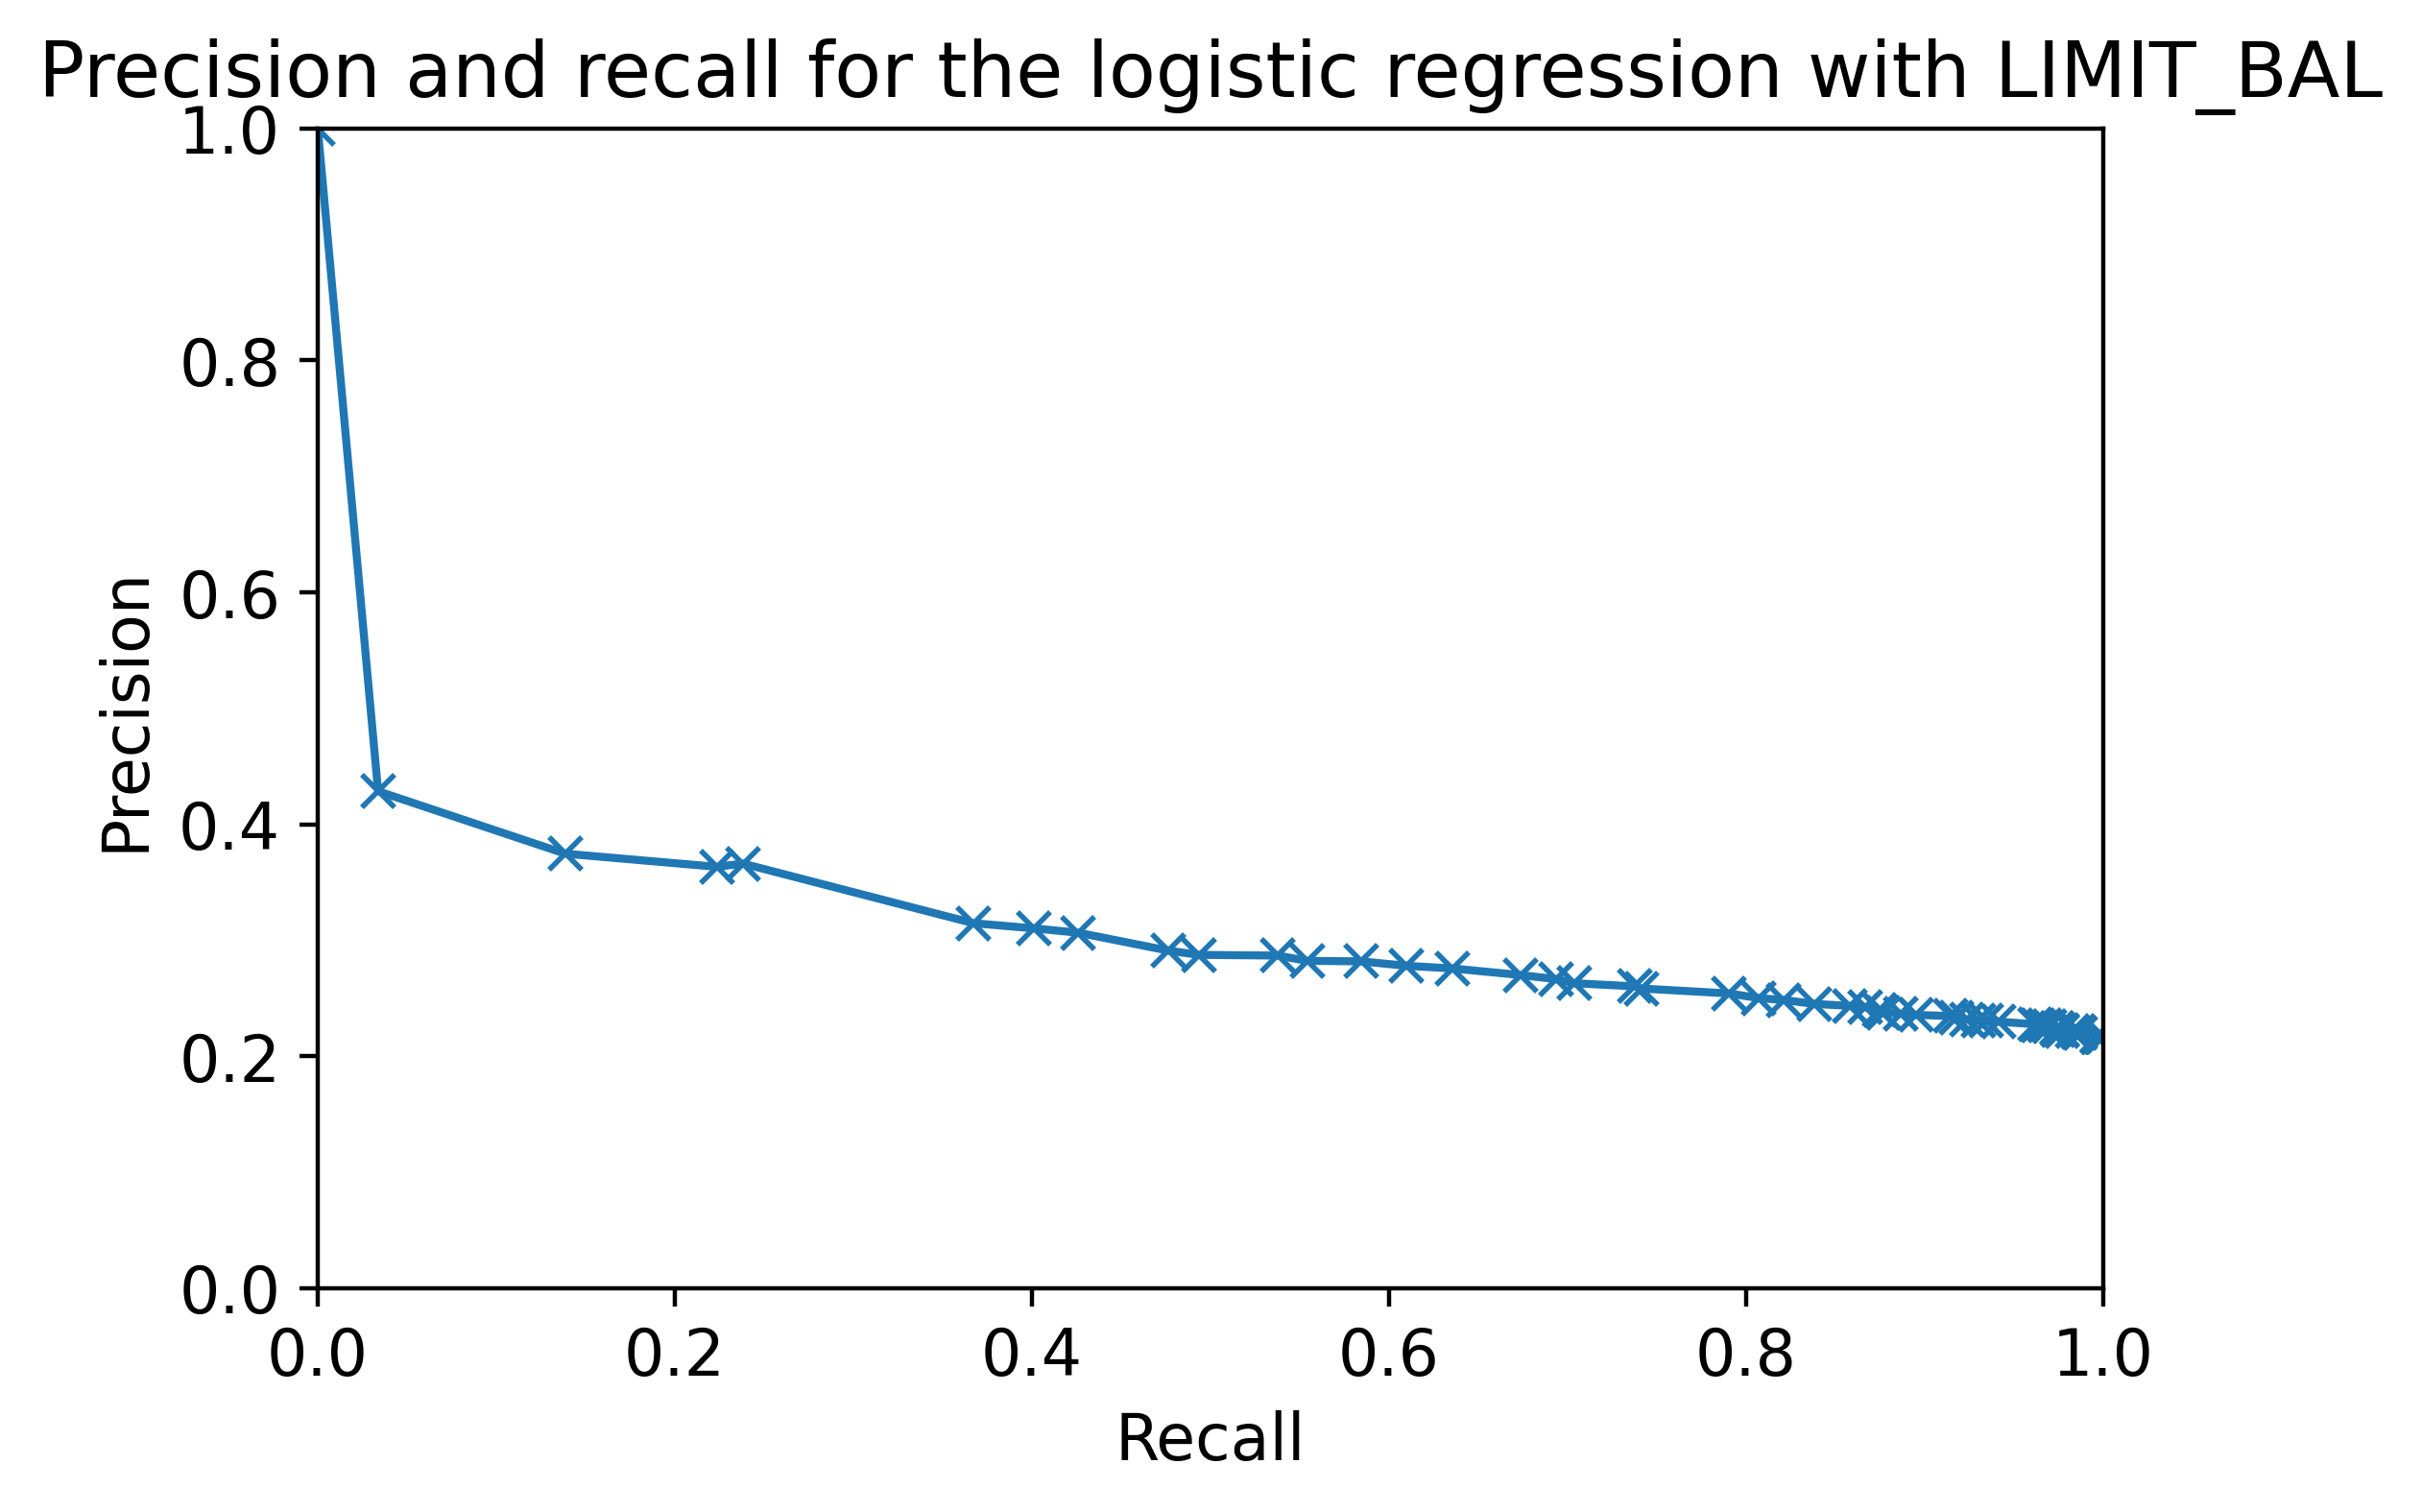

In [130]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [131]:
#calculate the AUC of the precision-recall curve
metrics.auc(recall, precision)

0.31566964427378624

In [132]:
#let's recalculate ROC AUC for the training data

y_train2_pred_prob = log_r.predict_proba(X_train2)

metrics.roc_auc_score(y_train2, y_train2_pred_prob[:,1])

0.6182918113358344

**Quantitatively, we can see that this AUC is not all that different from the test data ROC
AUC we calculated earlier. Both are about 0.62. Conceptually, what is the difference?
When we calculate this metric on the training data, we are measuring the model's
skill in predicting the same data that "taught" the model how to make predictions.
We are seeing how well the model fits the data. On the other hand, test data metrics
indicate performance on out-of-sample data the model hasn't "seen" before. If there
was much of a difference in these scores, which usually would come in the form of a
higher training score than the test score, it would indicate that while the model fits
the data well, the trained model does not generalize well to new, unseen data**

**In this case, the training and test scores are similar, meaning the model does about
as well on out-of-sample data as it does on the same data used in model training**

# Features Exploration


Previously we examined just examine two features and its relationship with the response variable, for the purpose of getting familiar with ML models. However, this is not the way to go. It is important to evaluate the features i.e. chose them in a systematic way, and to know which are relevant for ML models and directly impact the response variable.

This is what I am learning here:

A popular way of getting see how all the features relates with a response variable, and how they relate to each other is a **correlation plot**

In [133]:
#import seaborn-fancy ploting package

import seaborn as sns

In [134]:
#let's see our features and see the first and last five, adding to a list

fts = clean_df3.columns.tolist()

In [135]:
fts[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [136]:
fts[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

- Recall that we are not to use the **gender variable** due to ethical concerns.

- Also, learned that PAY_2, PAY_3,…, PAY_6 are incorrect and should be ignored. 

- Also, we are not going to examine the one-hot encoding we created from the EDUCATION variable, since the information from those columns is already included in the original feature, at least in some form. We will just use the EDUCATION feature directly.

- Finally, it makes no sense to use ID as a feature, since this is simply a unique account identifier and has nothing to do with the response variable.

All this would be removed

In [137]:
remove_fts = ['ID', 'SEX','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',\
              'EDUCATION_CAT',\
              'graduate school', 'high school', 'none',\
              'others', 'university']

In [138]:
#using list comprehension in python to remove this fts

fts = [item for item in fts if item not in remove_fts]
#fts

#### Next,  correlation-pearson correlation

before a correlation plot, we must calculate a correlation matrix

Pearson correlation is used to measure the
strength and direction (that is, positive or negative) of the linear relationship between
two variables

In [139]:
corr = clean_df3[fts].corr().round(2)
corr

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.00,-0.23,-0.11,0.15,-0.27,0.29,0.28,0.29,0.29,0.30,0.29,0.19,0.19,0.21,0.20,0.22,0.22,-0.15
EDUCATION,-0.23,1.00,-0.14,0.18,0.11,0.02,0.01,0.01,-0.01,-0.01,-0.01,-0.04,-0.03,-0.04,-0.04,-0.04,-0.05,0.03
MARRIAGE,-0.11,-0.14,1.00,-0.41,0.02,-0.03,-0.03,-0.03,-0.03,-0.03,-0.02,-0.00,-0.01,-0.00,-0.01,-0.00,-0.01,-0.03
AGE,0.15,0.18,-0.41,1.00,-0.04,0.06,0.05,0.05,0.05,0.05,0.05,0.03,0.03,0.03,0.03,0.02,0.02,0.01
PAY_1,-0.27,0.11,0.02,-0.04,1.00,0.19,0.19,0.18,0.18,0.18,0.18,-0.08,-0.07,-0.07,-0.06,-0.06,-0.06,0.33
BILL_AMT1,0.29,0.02,-0.03,0.06,0.19,1.00,0.95,0.90,0.86,0.83,0.80,0.14,0.11,0.15,0.16,0.16,0.18,-0.02
BILL_AMT2,0.28,0.01,-0.03,0.05,0.19,0.95,1.00,0.94,0.89,0.86,0.83,0.28,0.11,0.14,0.15,0.15,0.17,-0.01
BILL_AMT3,0.29,0.01,-0.03,0.05,0.18,0.90,0.94,1.00,0.93,0.89,0.86,0.24,0.29,0.12,0.14,0.16,0.18,-0.01
BILL_AMT4,0.29,-0.01,-0.03,0.05,0.18,0.86,0.89,0.93,1.00,0.94,0.90,0.23,0.22,0.29,0.13,0.16,0.17,-0.01
BILL_AMT5,0.30,-0.01,-0.03,0.05,0.18,0.83,0.86,0.89,0.94,1.00,0.95,0.21,0.19,0.24,0.30,0.14,0.16,-0.01


In [140]:
#let's see the first five rows and columns

corr.iloc[0:5, 0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.00,-0.23,-0.11,0.15,-0.27
EDUCATION,-0.23,1.00,-0.14,0.18,0.11
MARRIAGE,-0.11,-0.14,1.00,-0.41,0.02
AGE,0.15,0.18,-0.41,1.00,-0.04
PAY_1,-0.27,0.11,0.02,-0.04,1.00


<AxesSubplot:>

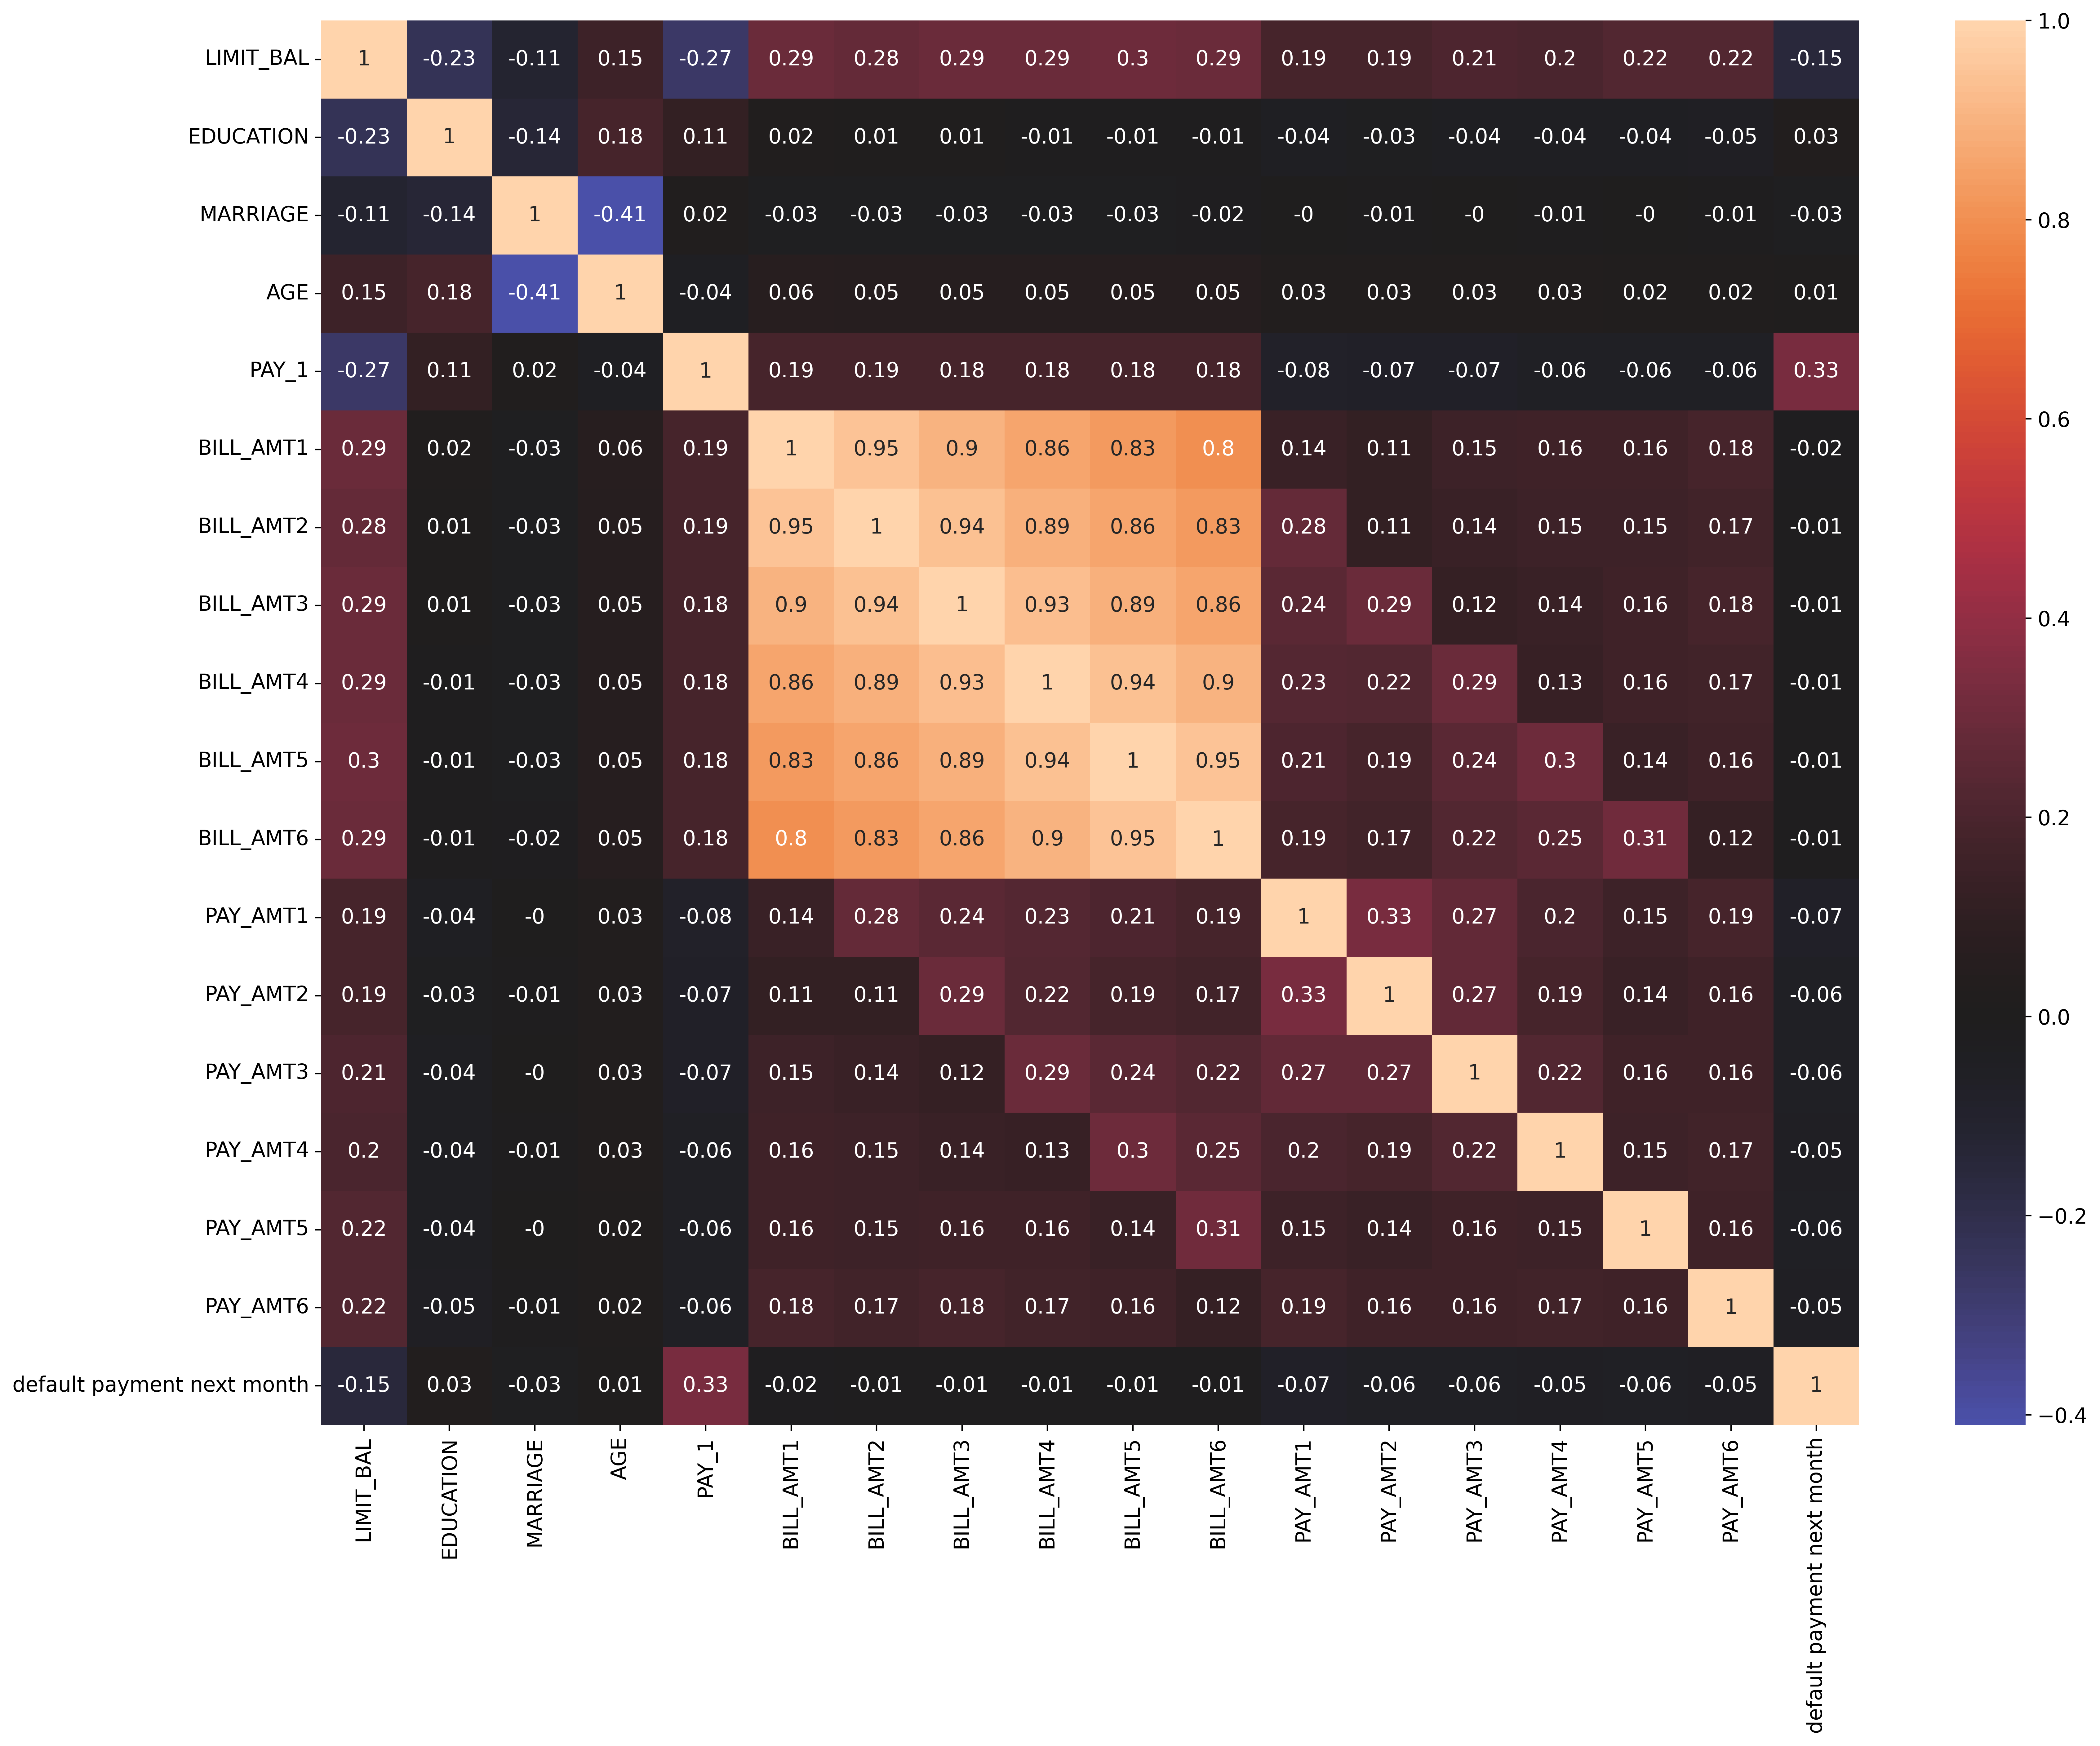

In [141]:
#correlation plot with an heatmap expression
plt.figure(figsize=(20,15))
sns.heatmap(corr.round(2), annot=True,
           xticklabels=corr.columns.values, #features
           yticklabels=corr.columns.values, #response
           center=0)

**What does this plot tell us? At a high level, if two features, or a feature and the
response, are highly correlated with each other, you can say there is a strong
association between them. Features that are highly correlated to the response will
be good features to use for prediction. This high correlation could be positive or
negative**

Notice the PAY_1 feature is probably the
most strongly correlated feature to the response variable.We can also see that a
number of features are highly correlated to each other, in particular the BILL_AMT
features.

So we can readily say for now that **PAY_1** is likely going to be one of
the best, most predictive features for our model. The other feature that looks like it
may be important is **LIMIT_BAL**, which is negatively correlated

*Stronger linear correlations are closer to 1 or -1. If
there is no linear relation between X and Y, the correlation will be close to 0*

Now, theoretically pearson correlation are valid for continous response variable,and not binary response variable. Although it can still accomplish the purpose of giving a quick idea of the potential usefulness of features. However we can run other statistical analysis that can show the  relationship btw features with a categorical response variable.

In this case study, we would run ANOVA F-test, called f_classif. This would show f-statistics and p-value. In interpretation we would focus on the p-values. The p-values answers the question: for a given feature, how likely is the average value in the +ve class thesame in the -ve class?.

if  there is a diff average values of the feature between the positive and negative classes- THERE IS  A LOW P-VALUE,  and might probably be a good feature in ml model has it might help discriminate btw +ve and -ve classes

**Let's see the P-value and F-stat:**

Here we would also apply a method called univariate feature selection: *the practice of testing features one by one against the response
variable, to see which ones have predictive power*

In [142]:
#the ANOVA F-test
#firstly we seperate out the features and response as numpy arrayas
X = clean_df3[fts].iloc[:,:-1].values  #features
y = clean_df3[fts].iloc[:,-1].values   #response

In [143]:
print(X.shape, y.shape) #17 features, both features have the same no of samples

(26664, 17) (26664,)


In [144]:
#f-stat from sklearn

from sklearn.feature_selection import f_classif

#f_stat = f-statistic, f_p_values= p-values
[f_stat, f_p_values] = f_classif(X,y) 

In [145]:
#let's create a new df to see the output and investigate closely

f_test_df = pd.DataFrame({'Feature':fts[:-1], 'F statistic':f_stat,
                          'p value':f_p_values})

f_test_df.sort_values('p value') #df sorting by p_values in ascending order

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


Note that for every decrease in p-value, there is an increase in the F-statistic.

*The conclusions we can draw from the DataFrame of F-statistics and p-values
are similar to what we observed in the correlation plot: PAY_1 and LIMIT_
BAL appear to be the most useful features. They have the smallest p-values,
indicating the average values of these features are significantly different
between the positive and negative classes, and these features will help predict
which class a sample belongs to.*

##### performing univariate feature selection

This is helpful if you have a very large number of features, many
of which may be totally useless, and would like a quick way to get a short list of which ones might be most useful. The F-test can help with univariate feature selection


In [146]:
#let's retrieve 20% of features with the highest f-stat

from sklearn.feature_selection import SelectPercentile

In [147]:
selector = SelectPercentile(f_classif, percentile=20)

In [148]:
selector

SelectPercentile(percentile=20)

In [149]:
selector.fit(X, y)

SelectPercentile(percentile=20)

In [150]:
#to show the names of the features selected

top_fts = selector.get_support()

top_fts

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [151]:
features = fts[:-1]

In [152]:
best_fts = [features[counter]
           for counter in range(len(features))
           if top_fts[counter]]

best_fts

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

The selected features agree with the top four rows of our DataFrame of F-test
results, so the feature selection has worked as expected.

#### Let's interprete this feature selected
**PAY_1** is the payment status of the account, in the most
recent month. As we learned in the initial data exploration, there are some values that indicate that the account was in good standing: -2 means no account usage, -1 means balance paid in full, and 0 means at least the minimum payment was made. On the other hand, positive integer values indicate a delay of payment by that many months.
Accounts with delayed payments last month were accounts that could be consideredin default. This means that, essentially, this feature captures **historical values of the response variable.** Features such as this are extremely important as one of the bestpredictors for just about any machine learning problem is historical data on the same thing you are trying to predict (that is, the response variable). This should make sense: people who have defaulted before are probably at the highest risk of defaulting again.


**LIMIT_BAL** the credit limit of accounts? Thinking about how credit limits are assigned, it is likely that our client has assessed how risky a borrower is when deciding their credit limit. Riskier clients should be given lower limits, so the creditor is less exposed. Therefore, we may expect to see a higher probability of default for accounts with lower values for LIMIT_BAL.

To further understand if the features would be useful for modeling with the response variable, let's see a graphical exploration, this would help us see whether our interpretation or hypothesis above(the interpretation) is compatible with what we can see in the data.



### Graphical  Visualization of Features relationship with Response Variable-y

In [153]:
#first, calculate a baseline for the response var: the default rate

def_rate = clean_df3['default payment next month'].mean()

def_rate

0.2217971797179718

In [154]:
#the default rate of PAY_1 fts for its diff categories in relation to y
#pay_1 is sort of an hybrid categorical and numerical
#so we would "groupby/mean" mtd to see its default rate..
#for each category

group_by_pay_mean_y = clean_df3.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


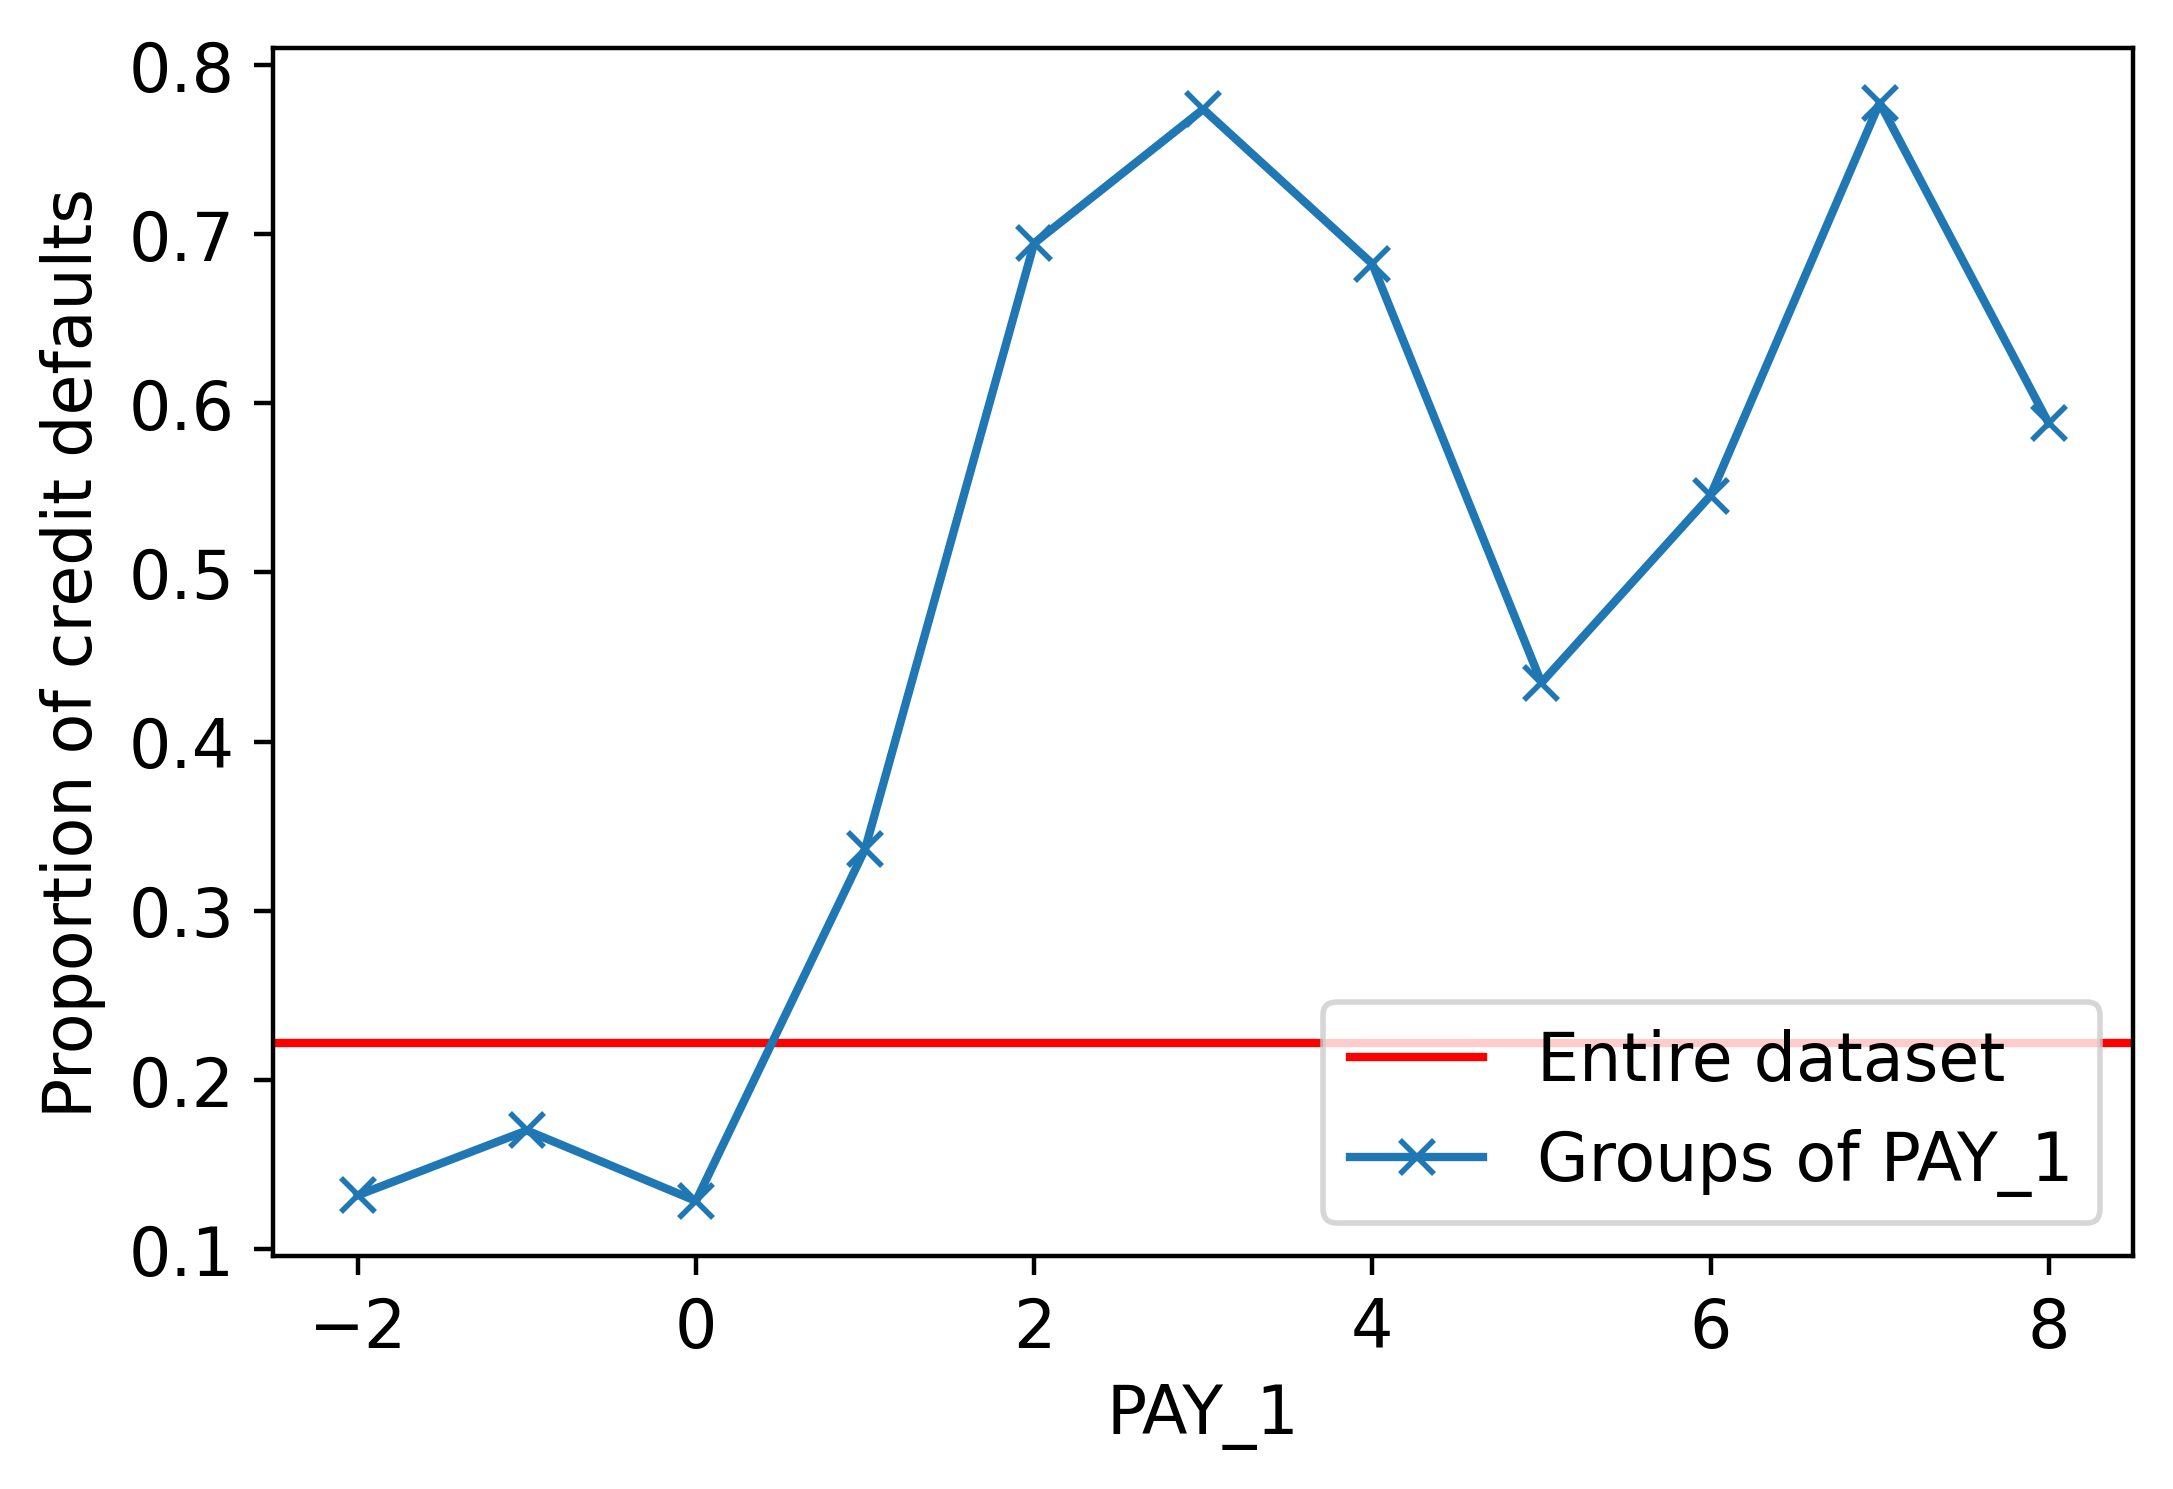

In [155]:
#let's visualize this

axes = plt.axes()

axes.axhline(def_rate, color='red')

group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)

axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

Notice from the visualization, that the accounts in good standing(-1, -2, 0) are well below the default rate of 22%. and over 30% of the accounts that defaulted last month we default again(the positive values of PAY_1). The proportion of there credit defaults is well above the average default rate which is 22%. i.e those who defaulted before are in fact likely to default again.

Text(0.5, 1.0, 'Credit limits by response variable')

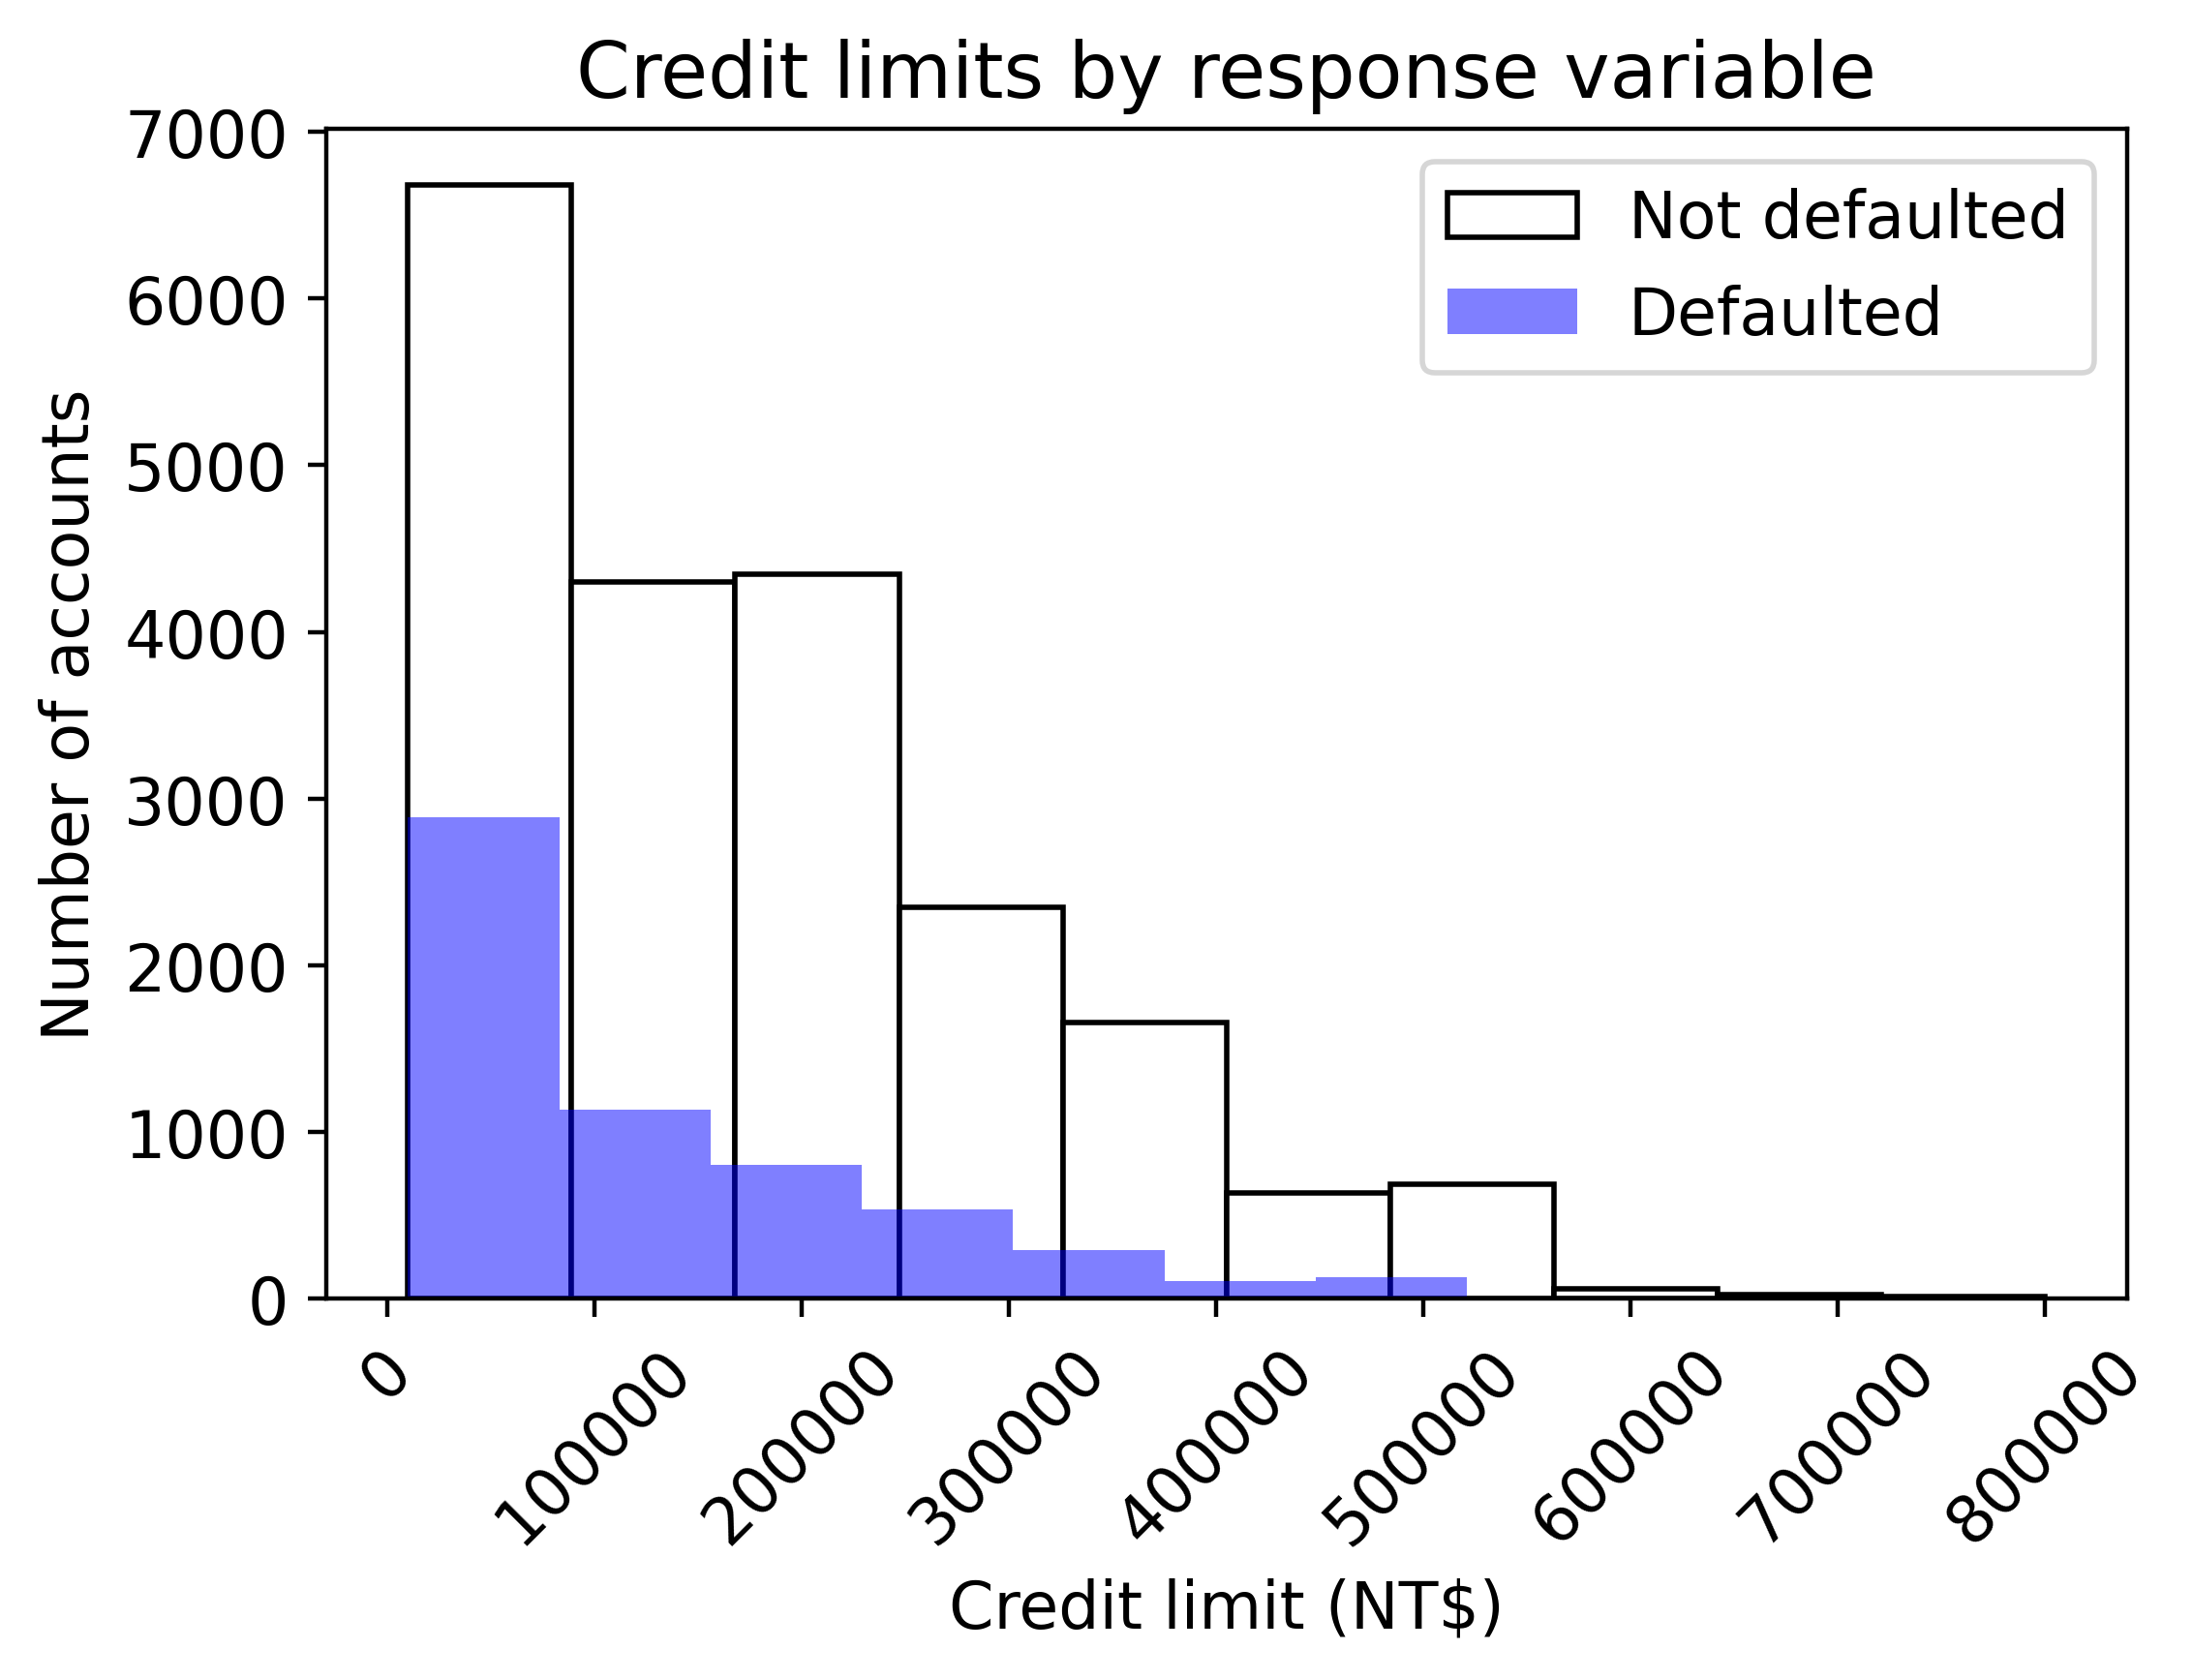

In [156]:
#next, the Limit_bal; its a numerical feature with many unique values.
#to visualize this for a classification problem we would plot multiple hist
#on the same axis
#as a way to to seperate the classes, we index them from the df using...
#logical arrays

pos_mask = y == 1
neg_mask = y == 0

#create the dual hist plot

axes = plt.axes()
axes.hist(clean_df3.loc[neg_mask, 'LIMIT_BAL'], edgecolor='black',\
         color='white')
axes.hist(clean_df3.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, edgecolor=None,\
         color='blue')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

The take-away here quickly is that:he transparent histogram is bigger than the blue
one. This is due to the fact that fewer accounts default than don't default.

## Creating the Logistic Regression model with the two features

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    clean_df3[['PAY_1','LIMIT_BAL']].values,
    clean_df3['default payment next month'].values, test_size=0.2,
    random_state=24)

In [159]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear')

In [160]:
lr_model

LogisticRegression(solver='liblinear')

In [161]:
lr_model.fit(X_train3, y_train3) 

y_pred = lr_model.predict(X_test3)

y_pred_proba = lr_model.predict_proba(X_test3)

In [162]:
from sklearn.metrics import roc_auc_score

In [163]:
print(lr_model.coef_, lr_model.intercept_)

[[ 8.27451187e-11 -6.80876727e-06]] [-6.57647457e-11]


In [164]:
roc_auc_score(y_test3, y_pred_proba[:,1])

0.627207450280691

##### Results:

What we've seen here is that we can slightly
boost model performance above our previous efforts: using just LIMIT_BAL as a feature in the previous chapter's activity, the ROC AUC was a bit less at 0.62, instead of 0.63 here.

This somewhat not a good performance. but we can improve performance.

HOW? Let's see:



It's probable that our model is underfitted has it did not fit to training data. Hence the model performance is low. So to improve the model performance we can adopt regularization.

In [165]:
X = clean_df3[features].values

In [166]:
X_train, X_test, y_train, y_test = \
train_test_split(X, clean_df3['default payment next month'].values,
                test_size=0.2, random_state=24)

for this large datasets, lets use regularization of L1, and base on documentation the solver to adopt would be saga. Howvever saga isn't robust for unscaled data so we would have to scale the data, so all features are on the same scale, and equally regularized

In [167]:
from sklearn.preprocessing import MinMaxScaler

min_max_sc = MinMaxScaler()

In [168]:
#next create a logistic regression with saga solver

lr = LogisticRegression(solver='saga', penalty='l1',
                       max_iter=1000)

#max_iter = 1000 coz we want the solver to have enough iter to find a good solu

In [169]:
#next we import pipeline class so to create a pipeline of both..
#the scaler and the logistic regression model..
#we use 'scaler' and 'model'

from sklearn.pipeline import Pipeline

scale_lr_pipeline = Pipeline (
  steps=[('scaler', min_max_sc), ('model', lr)])

In [170]:
#let's view each stage of the pipeline

scale_lr_pipeline.get_params()
scale_lr_pipeline.get_params() ['model__C']
scale_lr_pipeline.set_params(model__C = 2)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=2, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [171]:
C_val_exponents = np.linspace(2,-3,6)

C_vals = np.float64(10)**C_val_exponents  #olu revise this place again

In [172]:
from sklearn.model_selection import KFold
n_folds = 4
k_folds = KFold(n_splits=n_folds, shuffle=False)

In [173]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [174]:
def cross_val_C_search_pipe(k_folds, C_vals, pipeline, X, Y):
    
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)

    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        pipeline.set_params(model__C = C_vals[c_val_counter])
        #Count folds for each value of C
        fold_counter = 0
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            #Fit the model on the training data
            pipeline.fit(X_cv_train, y_cv_train)

            #Get the training ROC AUC
            y_cv_train_predict_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            #Get the testing ROC AUC
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

            #Increment the fold counter
            fold_counter += 1

        #Indicate progress
        print('Done with C = {}'.format(pipeline.get_params()['model__C']))

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [175]:
%%time
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline,
                        X_train, y_train)

Done with C = 100.0
Done with C = 10.0
Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001
Wall time: 42.4 s


Text(0.5, 1.0, 'Cross validation on Case Study problem')

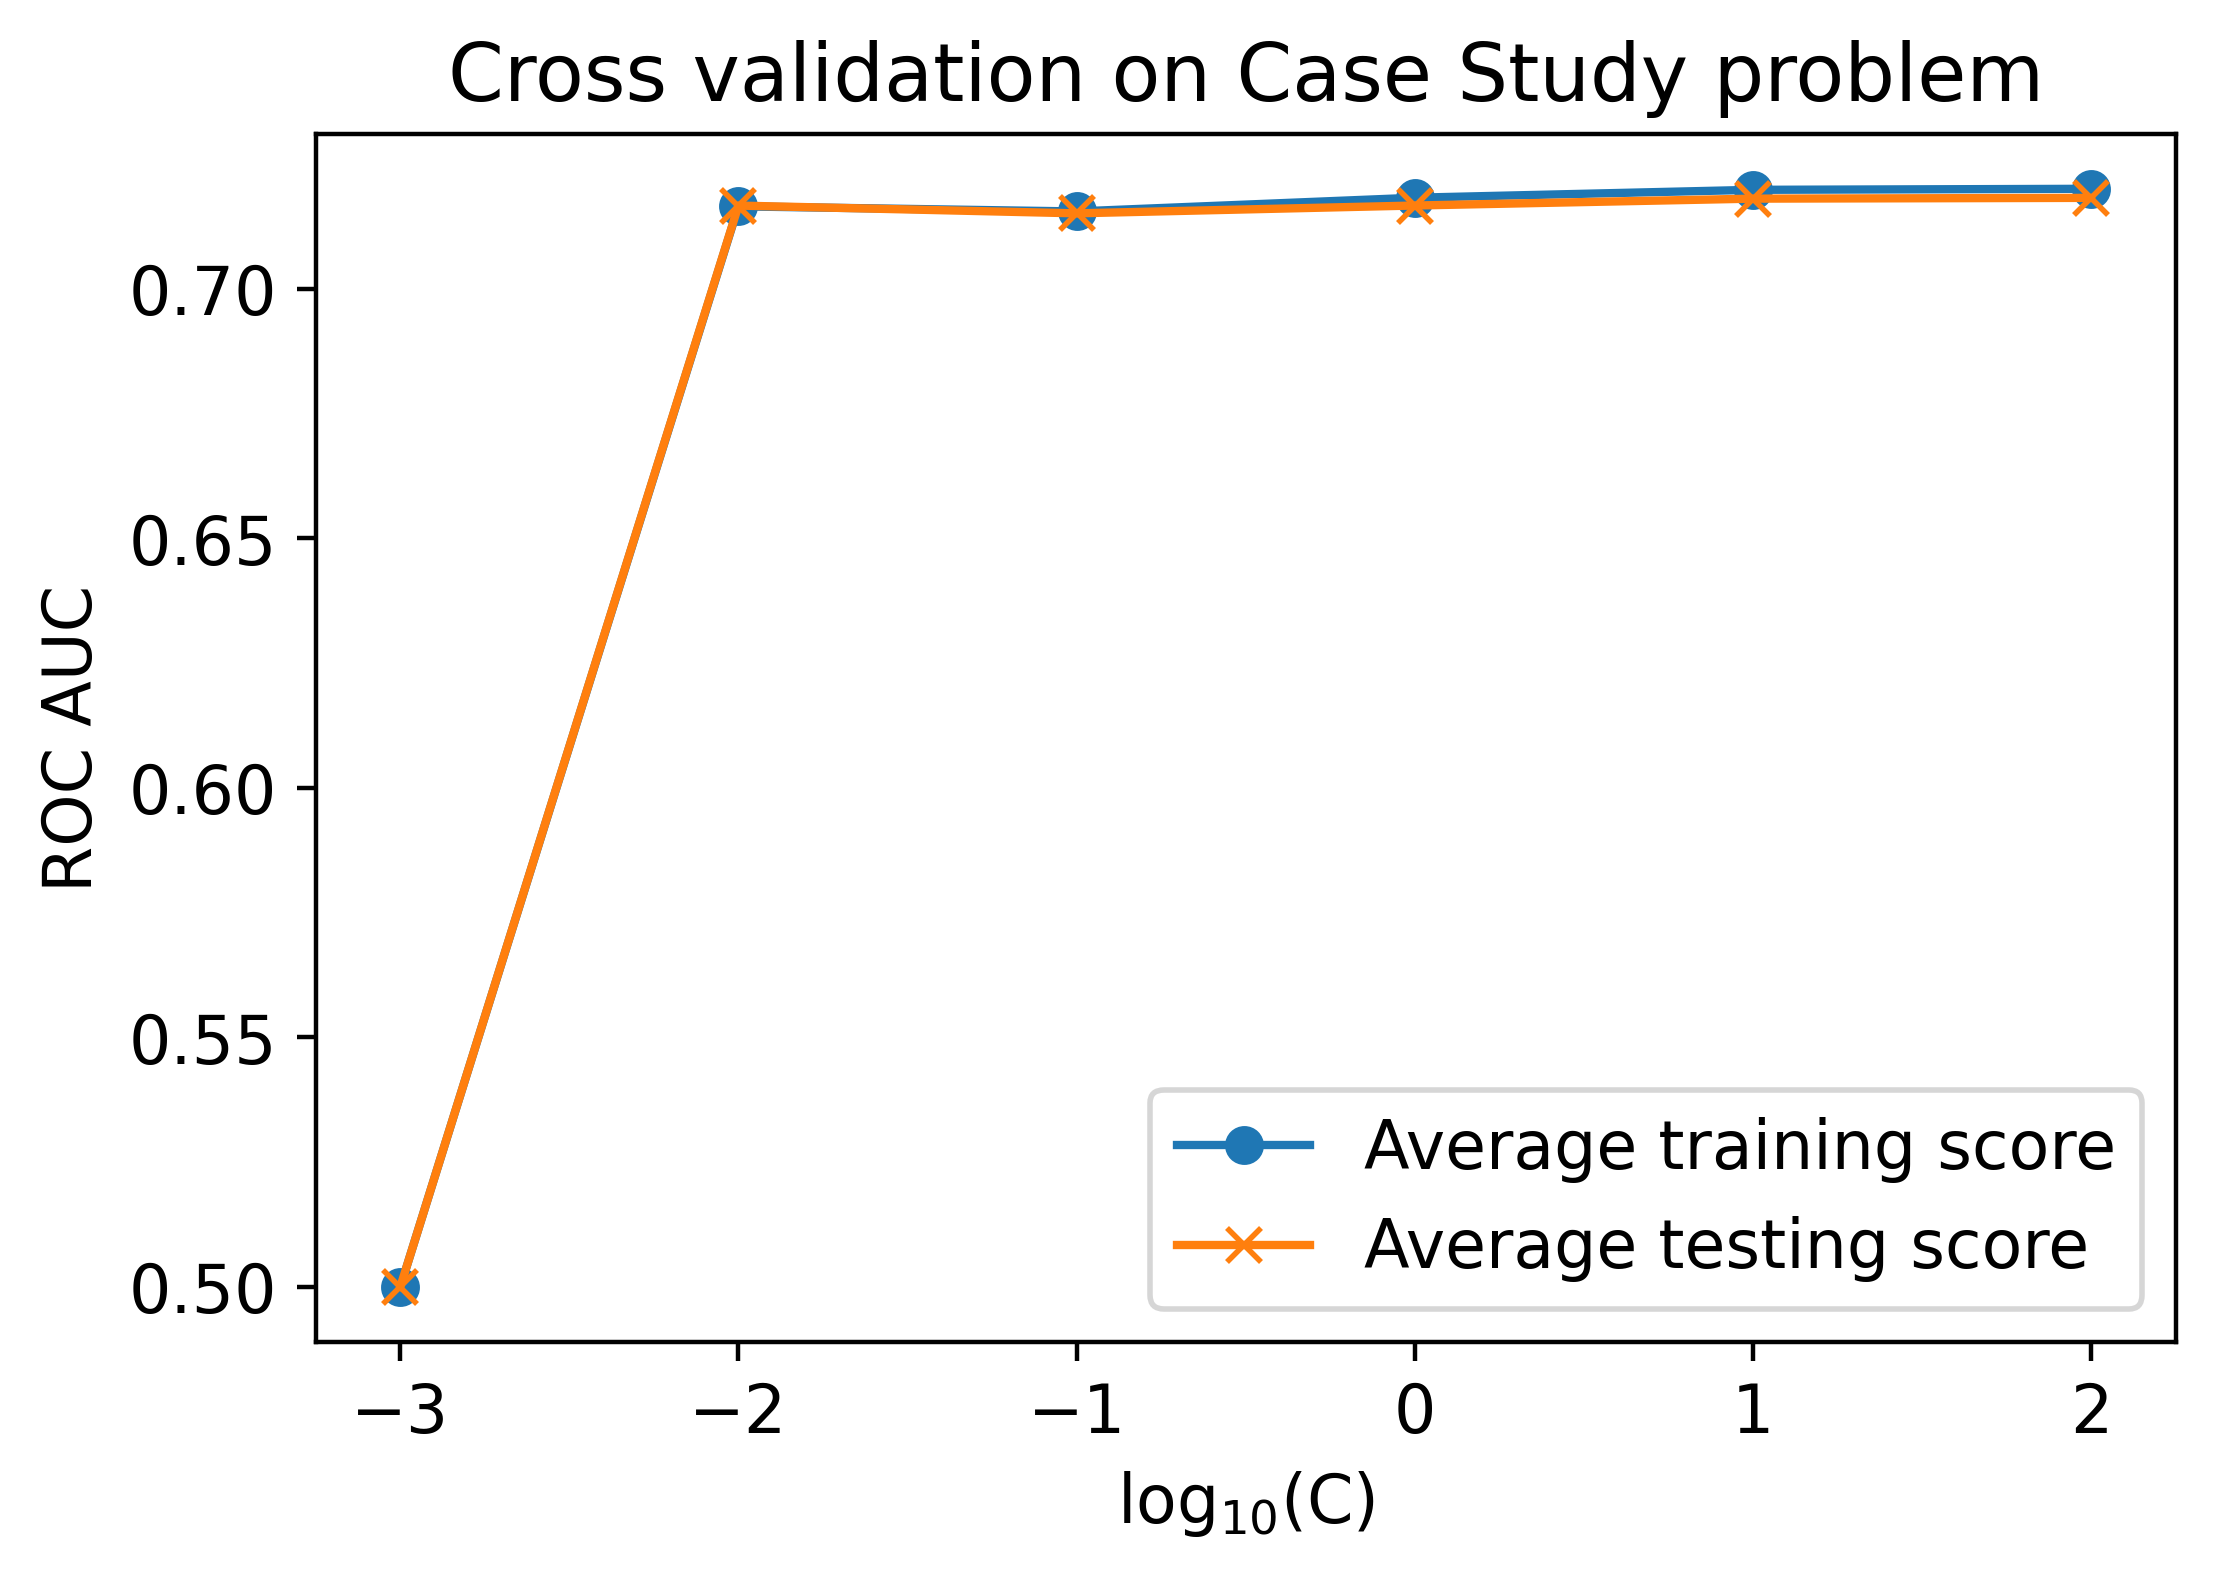

In [176]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation on Case Study problem')

In [177]:
np.mean(cv_test_roc_auc, axis=0)

array([0.71816275, 0.71800636, 0.71662871, 0.71506449, 0.71661792,
       0.5       ])

Notice that regularization does not impart much benefit here, as may
be expected: for lower C values, which correspond to stronger regularization,
model testing (as well as training) performance decreases. While we are able to
increase model performance over our previous efforts by using all the features
available, it appears there is no overfitting going on. Instead, the training and
test scores are about the same. Instead of overfitting, it's possible that we may
be underfitting. Let's try engineering some interaction features to see if they can
improve performance.